In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np
import missingno as msno
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import IterativeImputer
from scipy.stats import zscore

# Exploratory Data Analysis

In [2]:
df_original = pd.read_csv('./Data/london_cleaned_data.csv')
df_original.head()

,property_id,price,address,house_type,number_of_bedrooms,number_of_bathrooms,number_of_receptions,other_features,tenure,lease_time,...,latitude,longitude,school_1_name,school_1_distance,school_2_name,school_2_distance,train_1_name,train_1_distance,train_2_name,train_2_distance
0,1,300000.0,"Ringers Road, Bromley BR1",flat,1.0,1.0,1.0,650.0,leasehold,118.0,...,51.401890,0.015865,st mark's church of england primary school,0.2,bullers wood school for boys,0.2,bromley south,0.2,bromley north,0.5
1,2,125000.0,"Downham Way, Bromley, Kent BR1",studio,NaN,1.0,1.0,NaN,leasehold,82.0,...,NaN,NaN,launcelot primary school,0.1,haberdashers' aske's knights academy,0.1,grove park,0.4,sundridge park,1.0
2,3,595000.0,"Rolvenden Gardens, Bromley BR1",terraced house,3.0,2.0,1.0,NaN,freehold,NaN,...,51.411739,0.036798,breaside preparatory school,0.3,scotts park primary school,0.3,elmstead woods,0.5,sundridge park,0.7
3,4,1475000.0,"Upper Park Road, Bromley BR1",detached house,7.0,6.0,3.0,NaN,freehold,NaN,...,51.409714,0.026188,the tutorial foundation (sen),0.1,st joseph's catholic primary school,0.2,sundridge park,0.4,bromley north,0.4
4,5,1499950.0,"Garden Lane, Bromley BR1",detached house,5.0,1.0,1.0,NaN,freehold,NaN,...,51.416840,0.025992,st joseph's catholic primary school,0.4,the tutorial foundation (sen),0.5,sundridge park,0.4,bromley north,0.7


In [3]:
df = df_original.copy()

In [4]:
df.columns

Index(['property_id', 'price', 'address', 'house_type', 'number_of_bedrooms',
       'number_of_bathrooms', 'number_of_receptions', 'other_features',
       'tenure', 'lease_time', 'service_charge', 'tax_band', 'ground_rent',
       'commonhold_details', 'points_of_interest', 'listing_features',
       'description_text', 'property_link', 'postcode', 'latitude',
       'longitude', 'school_1_name', 'school_1_distance', 'school_2_name',
       'school_2_distance', 'train_1_name', 'train_1_distance', 'train_2_name',
       'train_2_distance'],
      dtype='object')

In [5]:
## Dropping irrelevant columns
df_1 = df.drop(columns=['address', 'commonhold_details', 'points_of_interest', 'school_1_name', 
                           'school_2_name', 'train_1_name','train_2_name'])

In [6]:
df_1.describe()

,property_id,price,number_of_bedrooms,number_of_bathrooms,number_of_receptions,other_features,lease_time,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
count,59142.000000,5.548900e+04,54114.000000,53497.000000,50490.000000,1.265600e+04,15236.000000,41284.000000,41284.000000,53438.000000,50199.000000,53685.000000,53685.000000
mean,31086.417876,1.011740e+06,2.522619,1.616988,1.328184,1.309698e+03,490.751903,51.338148,-0.549496,0.197107,0.294918,0.412806,0.674974
std,17214.687627,1.915755e+06,1.337070,0.954691,0.679590,1.526819e+04,8108.582965,3.001928,8.185579,0.131337,0.167002,0.374464,0.455637
min,1.000000,4.000000e+03,1.000000,1.000000,1.000000,0.000000e+00,1.000000,-43.538994,-123.345200,0.000000,0.000000,0.000000,0.000000
25%,16339.250000,4.000000e+05,2.000000,1.000000,1.000000,6.047500e+02,105.000000,51.456191,-0.223422,0.100000,0.200000,0.200000,0.400000
50%,31176.500000,5.800000e+05,2.000000,1.000000,1.000000,8.300000e+02,142.000000,51.503315,-0.151959,0.200000,0.300000,0.300000,0.600000
75%,45965.750000,9.200000e+05,3.000000,2.000000,1.000000,1.252000e+03,980.000000,51.553468,-0.065635,0.300000,0.400000,0.500000,0.800000
max,60751.000000,9.900000e+07,47.000000,40.000000,17.000000,1.675000e+06,999999.000000,57.579407,176.832062,2.100000,2.900000,7.300000,7.300000


In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59142 entries, 0 to 59141
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           59142 non-null  int64  
 1   price                 55489 non-null  float64
 2   house_type            55576 non-null  object 
 3   number_of_bedrooms    54114 non-null  float64
 4   number_of_bathrooms   53497 non-null  float64
 5   number_of_receptions  50490 non-null  float64
 6   other_features        12656 non-null  float64
 7   tenure                55575 non-null  object 
 8   lease_time            15236 non-null  float64
 9   service_charge        29237 non-null  object 
 10  tax_band              55575 non-null  object 
 11  ground_rent           29101 non-null  object 
 12  listing_features      54795 non-null  object 
 13  description_text      55575 non-null  object 
 14  property_link         59142 non-null  object 
 15  postcode           

In [8]:
sorted_df = df_1.sort_values(by='price', ascending=False)
sorted_df.tail(10)

,property_id,price,house_type,number_of_bedrooms,number_of_bathrooms,number_of_receptions,other_features,tenure,lease_time,service_charge,...,listing_features,description_text,property_link,postcode,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
59055,60665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,https://www.zoopla.co.uk/for-sale/details/6116...,CR4,NaN,NaN,NaN,NaN,NaN,NaN
59059,60669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,https://www.zoopla.co.uk/for-sale/details/5962...,CR4,NaN,NaN,NaN,NaN,NaN,NaN
59060,60670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,https://www.zoopla.co.uk/for-sale/details/6172...,CR4,NaN,NaN,NaN,NaN,NaN,NaN
59063,60673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,https://www.zoopla.co.uk/for-sale/details/4401...,CR4,NaN,NaN,NaN,NaN,NaN,NaN
59092,60702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,https://www.zoopla.co.uk/for-sale/details/6508...,CR5,NaN,NaN,NaN,NaN,NaN,NaN
59096,60706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,https://www.zoopla.co.uk/for-sale/details/6506...,CR5,NaN,NaN,NaN,NaN,NaN,NaN
59104,60714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,https://www.zoopla.co.uk/for-sale/details/6503...,CR5,NaN,NaN,NaN,NaN,NaN,NaN
59105,60715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,https://www.zoopla.co.uk/for-sale/details/6503...,CR5,NaN,NaN,NaN,NaN,NaN,NaN
59109,60719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,https://www.zoopla.co.uk/for-sale/details/6502...,CR5,NaN,NaN,NaN,NaN,NaN,NaN
59116,60726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,https://www.zoopla.co.uk/for-sale/details/6499...,CR5,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# remove rows with price value missing
df_2 = df_1.dropna(subset=['price'])

In [10]:
sorted_df = df_2.sort_values(by='price', ascending=False)
sorted_df.tail(10)

,property_id,price,house_type,number_of_bedrooms,number_of_bathrooms,number_of_receptions,other_features,tenure,lease_time,service_charge,...,listing_features,description_text,property_link,postcode,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
576,577,6900.0,land,NaN,NaN,NaN,871.0,freehold,NaN,NaN,...,Freehold\nLovely area very convenient\n,land for sale bromley keston meadowlands 0.02 ...,https://www.zoopla.co.uk/for-sale/details/5532...,BR2,51.367096,0.039222,1.0,1.3,2.1,3.0
44397,46007,6000.0,land,NaN,NaN,NaN,NaN,freehold,NaN,NaN,...,Freehold\n,thank you for your enquiry regarding the land ...,https://www.zoopla.co.uk/for-sale/details/6499...,TN16,NaN,NaN,1.1,1.3,3.7,3.8
570,571,6000.0,land,NaN,NaN,NaN,NaN,not available,NaN,NaN,...,100 Sq.M Plot of Land. Plot is largely flat wi...,sale by auction - 27 july 2023 - timed online...,https://www.zoopla.co.uk/for-sale/details/6137...,BR2,NaN,NaN,0.4,0.4,2.6,3.1
6767,8321,5000.0,land,NaN,NaN,NaN,NaN,not available,NaN,NaN,...,Freehold irregular shaped parcel of land.\nWit...,strapline\n\nauction sale - 21/06/2023\n\na fr...,https://www.zoopla.co.uk/for-sale/details/6479...,EN3,51.660892,-0.046961,0.2,0.2,0.8,0.8
45693,47303,5000.0,parking/garage,NaN,NaN,NaN,NaN,freehold,NaN,NaN,...,Freehold\nA Vacant Single Storey Lock Up Garage\n,"sold for £11,000. £5,000+\n\n2nd august 2023 0...",https://www.zoopla.co.uk/for-sale/details/6512...,TW16,51.422443,-0.417956,0.2,0.6,0.3,0.4
547,548,4000.0,land,NaN,NaN,NaN,NaN,not available,NaN,NaN,...,**super investment opportunity** Good sized pl...,sale by auction - 10 august 2023 - timed onli...,https://www.zoopla.co.uk/for-sale/details/6364...,BR2,NaN,NaN,0.4,0.4,2.6,3.1
548,549,4000.0,land,NaN,NaN,NaN,NaN,not available,NaN,NaN,...,Large rectangular shaped plot situated just of...,sale by auction - 27 july 2023 - timed online...,https://www.zoopla.co.uk/for-sale/details/6357...,BR2,NaN,NaN,0.4,0.4,2.6,3.1
545,546,4000.0,land,NaN,NaN,NaN,NaN,not available,NaN,NaN,...,Large rectangular shaped plot in peaceful coun...,sale by auction - 10 august 2023 - timed onli...,https://www.zoopla.co.uk/for-sale/details/6364...,BR2,NaN,NaN,0.4,0.4,2.6,3.1
560,561,4000.0,land,NaN,NaN,NaN,NaN,not available,NaN,NaN,...,Excellent investment opportunity*** Rectangula...,sale by auction - 27 july 2023 - timed online...,https://www.zoopla.co.uk/for-sale/details/6267...,BR2,NaN,NaN,0.4,0.4,2.6,3.1
519,520,4000.0,land,NaN,NaN,NaN,NaN,not available,NaN,NaN,...,**super investment opportunity** Good sized pl...,sale by auction - 27 july 2023 - timed online...,https://www.zoopla.co.uk/for-sale/details/6417...,BR2,NaN,NaN,0.4,0.4,2.6,3.1


In [11]:
# remove property houses less than 100000
df_3 = df_2[df_2['price'] >= 100000].copy()

In [12]:
df_3.describe()

,property_id,price,number_of_bedrooms,number_of_bathrooms,number_of_receptions,other_features,lease_time,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
count,55139.000000,5.513900e+04,53832.000000,53280.000000,50323.000000,1.258800e+04,15122.000000,41018.000000,41018.000000,53021.000000,49821.000000,53268.000000,53268.000000
mean,30486.409148,1.017745e+06,2.526267,1.617736,1.328776,1.307172e+03,492.533858,51.337992,-0.553923,0.196867,0.294645,0.412007,0.673331
std,17176.196311,1.920337e+06,1.335598,0.953718,0.679949,1.530320e+04,8139.015155,3.006391,8.203785,0.131008,0.166707,0.371864,0.452989
min,1.000000,1.000000e+05,1.000000,1.000000,1.000000,0.000000e+00,1.000000,-43.538994,-123.345200,0.000000,0.000000,0.000000,0.000000
25%,15725.500000,4.000000e+05,2.000000,1.000000,1.000000,6.070000e+02,105.000000,51.456413,-0.223256,0.100000,0.200000,0.200000,0.400000
50%,30273.000000,5.850000e+05,2.000000,1.000000,1.000000,8.310000e+02,143.000000,51.503334,-0.151986,0.200000,0.300000,0.300000,0.600000
75%,45237.500000,9.250000e+05,3.000000,2.000000,1.000000,1.253250e+03,980.000000,51.553448,-0.066004,0.300000,0.400000,0.500000,0.800000
max,60751.000000,9.900000e+07,47.000000,40.000000,17.000000,1.675000e+06,999999.000000,57.579407,176.832062,2.100000,2.900000,7.300000,7.300000


In [13]:
df_3['house_type'].unique()

array(['flat', 'studio', 'terraced house', 'detached house', 'property',
       'semi-detached house', 'end terrace house', 'maisonette',
       'town house', 'detached bungalow', 'block of flats', 'bungalow',
       'link-detached house', 'mews house', 'land',
       'semi-detached bungalow', 'country house', 'parking/garage',
       'cottage', 'farmhouse', 'mobile/park home', 'equestrian property',
       'room', 'terraced bungalow', 'penthouse', 'houseboat',
       'barn conversion', 'shared accommodation'], dtype=object)

In [14]:
# removing useless house type categories
useless_house_categories = ['land', 'parking/garage', 'lodge', 'mobile/park home', 'equestrian property', 'houseboat']
df_3['house_type'] = df_3['house_type'].apply(lambda x: np.nan if x in useless_house_categories else x)

In [15]:
df_4 = df_3.dropna(subset=['house_type']).copy()

In [16]:
df_4['house_type'].unique()

array(['flat', 'studio', 'terraced house', 'detached house', 'property',
       'semi-detached house', 'end terrace house', 'maisonette',
       'town house', 'detached bungalow', 'block of flats', 'bungalow',
       'link-detached house', 'mews house', 'semi-detached bungalow',
       'country house', 'cottage', 'farmhouse', 'room',
       'terraced bungalow', 'penthouse', 'barn conversion',
       'shared accommodation'], dtype=object)

In [17]:
property_tag = df_4[df_4['house_type'] == 'property']
property_tag

,property_id,price,house_type,number_of_bedrooms,number_of_bathrooms,number_of_receptions,other_features,tenure,lease_time,service_charge,...,listing_features,description_text,property_link,postcode,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
8,9,600000.0,property,5.0,2.0,2.0,1733.0,freehold,NaN,NaN,...,Freehold\nExtended Family Home\n5 bedrooms\nRe...,"hunters are delighted to offer to the market, ...",https://www.zoopla.co.uk/for-sale/details/6519...,BR1,51.425846,0.021660,0.3,0.3,0.3,0.9
67,68,100000.0,property,1.0,1.0,NaN,NaN,leasehold,NaN,Not available,...,Leasehold\nRetirement development\nCommunal ga...,jdm are delighted to offer to the market andri...,https://www.zoopla.co.uk/for-sale/details/6504...,BR1,51.415295,-0.077530,0.3,0.4,0.1,0.4
134,135,120000.0,property,1.0,1.0,1.0,NaN,leasehold,NaN,2626,...,Leasehold\nLarge Communal Garden\nFirst floor ...,"a well-presented and spacious one-bedroom, ret...",https://www.zoopla.co.uk/for-sale/details/6007...,BR1,51.374363,-0.015613,0.3,0.4,0.6,0.6
148,149,445000.0,property,3.0,1.0,2.0,726.0,freehold,NaN,NaN,...,Freehold\nThree Bedrooms\n15’9 by 10’11 Kitche...,a three-bedroom mid-terraced family home that ...,https://www.zoopla.co.uk/for-sale/details/6477...,BR1,NaN,NaN,0.1,0.2,0.5,0.8
183,184,112000.0,property,1.0,1.0,1.0,NaN,leasehold,NaN,Not available,...,Leasehold\nWarden Assisted Retirement Flat\nOn...,this warden assisted retirement flat is situat...,https://www.zoopla.co.uk/for-sale/details/6460...,BR1,51.407581,0.022904,0.2,0.3,0.2,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59008,60618,525000.0,property,3.0,1.0,1.0,NaN,freehold,NaN,NaN,...,Freehold\nThree Bedroom Family Home\nBeautiful...,"this is a beautifully presented, rear extended...",https://www.zoopla.co.uk/for-sale/details/6392...,CR4,51.413326,-0.167813,0.3,0.3,0.5,0.6
59035,60645,499000.0,property,NaN,NaN,NaN,NaN,freehold,NaN,NaN,...,Freehold\nBtl Investment\nBrand New Homes\nCom...,attention btl investors for sale by online a...,https://www.zoopla.co.uk/new-homes/details/628...,CR4,51.399555,-0.144668,0.2,0.4,0.7,0.7
59072,60682,875000.0,property,3.0,2.0,3.0,NaN,freehold,NaN,NaN,...,Freehold\nGrade llc House\nCloakroom\nSeparate...,a beautifully presented grade llc listed house...,https://www.zoopla.co.uk/for-sale/details/6519...,CR5,NaN,NaN,1.9,1.9,1.4,1.9
59081,60691,260000.0,property,1.0,1.0,1.0,NaN,share of freehold,NaN,Not available,...,Share of freehold\nGround Floor Office 60 Sq/m...,chain free - frost estate agents are pleased t...,https://www.zoopla.co.uk/for-sale/details/6514...,CR5,51.337486,-0.113928,0.6,0.6,0.1,0.4


In [18]:
# convert property to unknown
df_4['house_type'] = df_4['house_type'].apply(lambda x: 'unknown' if x == 'property' else x)

In [19]:
df_4['house_type'].unique()

array(['flat', 'studio', 'terraced house', 'detached house', 'unknown',
       'semi-detached house', 'end terrace house', 'maisonette',
       'town house', 'detached bungalow', 'block of flats', 'bungalow',
       'link-detached house', 'mews house', 'semi-detached bungalow',
       'country house', 'cottage', 'farmhouse', 'room',
       'terraced bungalow', 'penthouse', 'barn conversion',
       'shared accommodation'], dtype=object)

In [20]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54881 entries, 0 to 59141
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           54881 non-null  int64  
 1   price                 54881 non-null  float64
 2   house_type            54881 non-null  object 
 3   number_of_bedrooms    53698 non-null  float64
 4   number_of_bathrooms   53157 non-null  float64
 5   number_of_receptions  50215 non-null  float64
 6   other_features        12540 non-null  float64
 7   tenure                54880 non-null  object 
 8   lease_time            15088 non-null  float64
 9   service_charge        28954 non-null  object 
 10  tax_band              54880 non-null  object 
 11  ground_rent           28818 non-null  object 
 12  listing_features      54128 non-null  object 
 13  description_text      54880 non-null  object 
 14  property_link         54881 non-null  object 
 15  postcode           

In [21]:
# change other features to size
df_5 = df_4.rename(columns={'other_features': 'property_size'}).copy()
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54881 entries, 0 to 59141
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           54881 non-null  int64  
 1   price                 54881 non-null  float64
 2   house_type            54881 non-null  object 
 3   number_of_bedrooms    53698 non-null  float64
 4   number_of_bathrooms   53157 non-null  float64
 5   number_of_receptions  50215 non-null  float64
 6   property_size         12540 non-null  float64
 7   tenure                54880 non-null  object 
 8   lease_time            15088 non-null  float64
 9   service_charge        28954 non-null  object 
 10  tax_band              54880 non-null  object 
 11  ground_rent           28818 non-null  object 
 12  listing_features      54128 non-null  object 
 13  description_text      54880 non-null  object 
 14  property_link         54881 non-null  object 
 15  postcode           

In [22]:
df_5['property_size'].info()

<class 'pandas.core.series.Series'>
Int64Index: 54881 entries, 0 to 59141
Series name: property_size
Non-Null Count  Dtype  
--------------  -----  
12540 non-null  float64
dtypes: float64(1)
memory usage: 857.5 KB


In [23]:
df_5['property_size'].unique()

array([ 650.,   nan, 1733., ..., 3782., 2431., 6566.])

In [24]:
df_5[df_5['property_size'].isna()]

,property_id,price,house_type,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,tenure,lease_time,service_charge,...,listing_features,description_text,property_link,postcode,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
1,2,125000.0,studio,NaN,1.0,1.0,NaN,leasehold,82.0,816,...,Leasehold\n* Perfect residential or investment...,perfect residential or investment property wit...,https://www.zoopla.co.uk/for-sale/details/6521...,BR1,NaN,NaN,0.1,0.1,0.4,1.0
2,3,595000.0,terraced house,3.0,2.0,1.0,NaN,freehold,NaN,NaN,...,Freehold\nSpacious Reception Room\nLarge Kitch...,an immaculately presented three bedroom mid te...,https://www.zoopla.co.uk/for-sale/details/6520...,BR1,51.411739,0.036798,0.3,0.3,0.5,0.7
3,4,1475000.0,detached house,7.0,6.0,3.0,NaN,freehold,NaN,NaN,...,Freehold\n7 bedrooms\n6 bathrooms (4 ensuite)\...,ref dt0182. a rare to market and substantial v...,https://www.zoopla.co.uk/for-sale/details/6420...,BR1,51.409714,0.026188,0.1,0.2,0.4,0.4
4,5,1499950.0,detached house,5.0,1.0,1.0,NaN,freehold,NaN,NaN,...,Freehold\nLandscaped Southerly Facing Garden\n...,an exceptional five bedroom detached cottage s...,https://www.zoopla.co.uk/for-sale/details/6520...,BR1,51.416840,0.025992,0.4,0.5,0.4,0.7
5,6,595000.0,terraced house,3.0,1.0,3.0,NaN,freehold,NaN,NaN,...,Freehold\n1930s mid terrace\nStunning rear gar...,a charming 1930s mid-terrace house offering a ...,https://www.zoopla.co.uk/for-sale/details/6520...,BR1,NaN,NaN,0.1,0.2,0.6,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59137,60747,500000.0,semi-detached house,2.0,1.0,2.0,NaN,not available,NaN,NaN,...,Entrance Hall\nL Shaped Lounge\nAdditional Rec...,this attractive semi detached house requiring ...,https://www.zoopla.co.uk/for-sale/details/6490...,CR5,51.306942,-0.119828,0.3,0.4,1.3,1.6
59138,60748,495000.0,flat,3.0,2.0,1.0,NaN,not available,NaN,NaN,...,Three Bedroom Apartment\nTwo Gorgeous Balconie...,"a spacious brand new, three bedroom apartment....",https://www.zoopla.co.uk/new-homes/details/648...,CR5,51.324013,-0.136046,0.4,0.5,0.2,0.6
59139,60749,425000.0,flat,2.0,1.0,1.0,NaN,not available,NaN,NaN,...,Three Bedroom Apartment\nTwo Gorgeous Balconie...,a brand new two bedroom balcony apartment situ...,https://www.zoopla.co.uk/new-homes/details/648...,CR5,51.324013,-0.136046,0.4,0.5,0.2,0.6
59140,60750,320000.0,flat,1.0,1.0,1.0,NaN,not available,NaN,NaN,...,One Bedroom Apartment\nTwo Beautiful Terraces\...,a contemporary one bedroom apartment within a ...,https://www.zoopla.co.uk/new-homes/details/648...,CR5,51.324013,-0.136046,0.4,0.5,0.2,0.6


In [276]:
df_5.describe()

,property_id,price,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,lease_time,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
count,54875.000000,5.487500e+04,53694.000000,53153.000000,50213.000000,12535.000000,15088.000000,40852.000000,40852.000000,52767.000000,49582.000000,53014.000000,53014.000000
mean,30494.743599,1.017259e+06,2.524547,1.615901,1.327963,1122.278389,426.735353,51.337718,-0.545666,0.196312,0.293901,0.411063,0.672151
std,17174.742987,1.918793e+06,1.318210,0.932698,0.677404,1003.160730,413.837119,3.011839,8.157965,0.130013,0.165298,0.370733,0.451715
min,1.000000,1.000000e+05,1.000000,1.000000,1.000000,127.000000,1.000000,-43.538994,-123.345200,0.000000,0.000000,0.000000,0.000000
25%,15738.500000,4.000000e+05,2.000000,1.000000,1.000000,610.000000,105.000000,51.456508,-0.223073,0.100000,0.200000,0.200000,0.400000
50%,30286.000000,5.850000e+05,2.000000,1.000000,1.000000,831.000000,143.000000,51.503407,-0.151944,0.200000,0.300000,0.300000,0.600000
75%,45236.500000,9.250000e+05,3.000000,2.000000,1.000000,1249.000000,980.000000,51.553402,-0.066004,0.300000,0.400000,0.500000,0.800000
max,60751.000000,9.900000e+07,28.000000,26.000000,17.000000,16000.000000,3003.000000,57.579407,176.832062,2.100000,2.900000,7.300000,7.300000


In [272]:
df_5[(df_5['property_size'] >= 1251) & (df_5['price'] <= 500000)]

,property_id,price,house_type,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,tenure,lease_time,service_charge,...,listing_features,description_text,property_link,postcode,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
3855,5409,500000.0,unknown,3.0,2.0,2.0,1378.0,leasehold,999.0,Not available,...,Leasehold\nOne of the larger styles built\nSec...,"price guide: £500,000 - £525,000 \nhunters es...",https://www.zoopla.co.uk/for-sale/details/6431...,DA8,51.481800,0.164932,NaN,NaN,NaN,NaN
11796,13350,295000.0,unknown,NaN,2.0,2.0,1937.0,leasehold,66.0,Not available,...,"Leasehold\nPrevious Rental Income of £53,615 p...",commercial and business. floating office with ...,https://www.zoopla.co.uk/for-sale/details/5917...,KT1,51.413528,-0.309674,0.2,0.3,0.1,0.1
19841,21395,475000.0,semi-detached house,3.0,3.0,2.0,1283.0,freehold,NaN,NaN,...,Freehold\nPrivate garden\nTerrace\nOff street ...,"the property offers three bedrooms, lounge, ki...",https://www.zoopla.co.uk/for-sale/details/5362...,NW10,51.549553,-0.253433,0.1,0.2,0.3,0.7
20671,22225,425000.0,flat,3.0,1.0,1.0,1259.0,leasehold,NaN,Not available,...,Leasehold\nThree Bedroom Split Level First and...,three bedroom split level first and second flo...,https://www.zoopla.co.uk/for-sale/details/6147...,NW2,51.556126,-0.216675,0.2,0.4,0.3,0.5
21576,23130,400000.0,flat,2.0,2.0,1.0,1400.0,share of freehold,NaN,Not available,...,Share of freehold\n1400 Square Foot\nDuplex Fl...,"this incredibly large (1400sq ft), two double ...",https://www.zoopla.co.uk/for-sale/details/6444...,NW4,51.594357,-0.225155,0.1,0.2,0.6,1.0
25432,27038,460000.0,detached house,3.0,1.0,1.0,1263.0,freehold,NaN,NaN,...,Freehold\nDetached Home\nOpen Plan Kitchen And...,detached home - open plan kitchen and dining a...,https://www.zoopla.co.uk/for-sale/details/6381...,RM3,NaN,NaN,0.4,0.5,1.1,1.3
25604,27210,425000.0,semi-detached house,4.0,2.0,3.0,1464.0,freehold,NaN,NaN,...,Freehold\nSemi-Detached Home\nGood Sized Livin...,semi-detached home - good sized living room - ...,https://www.zoopla.co.uk/for-sale/details/6374...,RM5,51.599598,0.163969,0.1,0.4,1.9,2.1
25960,27566,460000.0,detached house,3.0,1.0,1.0,1263.0,freehold,NaN,NaN,...,Freehold\nDetached Home\nOpen Plan Kitchen And...,detached home - open plan kitchen and dining a...,https://www.zoopla.co.uk/for-sale/details/6381...,RM3,NaN,NaN,0.4,0.5,1.1,1.3
26132,27738,425000.0,semi-detached house,4.0,2.0,3.0,1464.0,freehold,NaN,NaN,...,Freehold\nSemi-Detached Home\nGood Sized Livin...,semi-detached home - good sized living room - ...,https://www.zoopla.co.uk/for-sale/details/6374...,RM5,51.599598,0.163969,0.1,0.4,1.9,2.1
26423,28029,450000.0,semi-detached house,4.0,3.0,2.0,1377.0,freehold,NaN,NaN,...,Freehold\n4 bedroom semi detatched\nApprox. 57...,carter & willow offer for sale this enlarged 1...,https://www.zoopla.co.uk/for-sale/details/6519...,RM8,51.551682,0.129065,0.1,0.2,0.8,1.1


In [299]:
df_5.describe()

,property_id,price,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,lease_time,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
count,54870.000000,5.487000e+04,53689.000000,53148.000000,50209.000000,12535.000000,15087.000000,40847.000000,40847.000000,52762.000000,49578.000000,53009.000000,53009.000000
mean,30492.490177,1.016131e+06,2.523031,1.614341,1.327133,1122.278389,426.758468,51.337696,-0.545702,0.196316,0.293907,0.411085,0.672163
std,17173.883364,1.913882e+06,1.306111,0.916419,0.668653,1003.160730,413.841094,3.012022,8.158463,0.130015,0.165301,0.370743,0.451719
min,1.000000,1.000000e+05,1.000000,1.000000,1.000000,127.000000,1.000000,-43.538994,-123.345200,0.000000,0.000000,0.000000,0.000000
25%,15737.250000,4.000000e+05,2.000000,1.000000,1.000000,610.000000,105.000000,51.456505,-0.223059,0.100000,0.200000,0.200000,0.400000
50%,30282.500000,5.850000e+05,2.000000,1.000000,1.000000,831.000000,143.000000,51.503407,-0.151944,0.200000,0.300000,0.300000,0.600000
75%,45232.750000,9.250000e+05,3.000000,2.000000,1.000000,1249.000000,980.000000,51.553402,-0.066004,0.300000,0.400000,0.500000,0.800000
max,60751.000000,9.900000e+07,22.000000,14.000000,14.000000,16000.000000,3003.000000,57.579407,176.832062,2.100000,2.900000,7.300000,7.300000


In [300]:
df_5[df_5['number_of_receptions'] == 14]

,property_id,price,house_type,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,tenure,lease_time,service_charge,...,listing_features,description_text,property_link,postcode,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
49897,51507,75000000.0,detached house,12.0,12.0,14.0,NaN,freehold,NaN,NaN,...,Freehold\n12 bedrooms\n14 reception rooms\n12 ...,set in just under 43 acres of breath-taking pa...,https://www.zoopla.co.uk/for-sale/details/6443...,UB9,51.573666,-0.501692,0.4,0.7,0.4,0.8


In [296]:
df_5.loc[52157, 'property_size'] = 7150

In [295]:
df_5.loc[52157, 'property_link']

'https://www.zoopla.co.uk/for-sale/details/64074669/?search_identifier=dc6d996e4c6d1452c8f4cda1e0261f3e451e1d27ca4dfabf544423ed7f2dc809'

In [266]:
df_5.loc[54642, 'listing_features']

'Leasehold\nThree bedrooms\nSplit-level\n731 sq.ft approx.\nLong lease\nChain free\n'

In [ ]:
df_5.loc[, 'description_text']

In [298]:
# df_5.drop(52157, inplace=True)

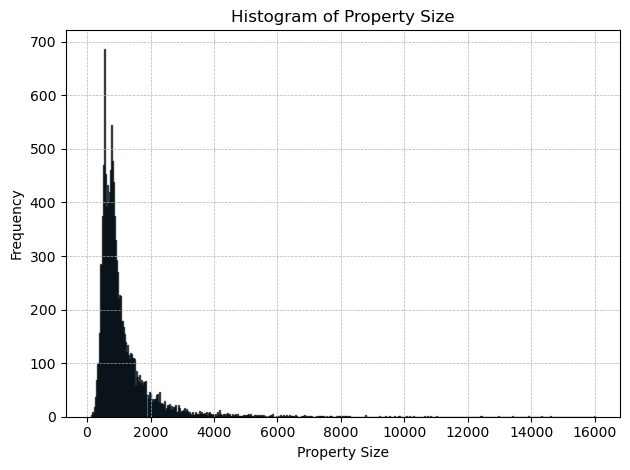

In [301]:
plt.hist(df_5['property_size'], bins=500, edgecolor='black', alpha=0.7)
plt.title('Histogram of Property Size')
plt.xlabel('Property Size')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

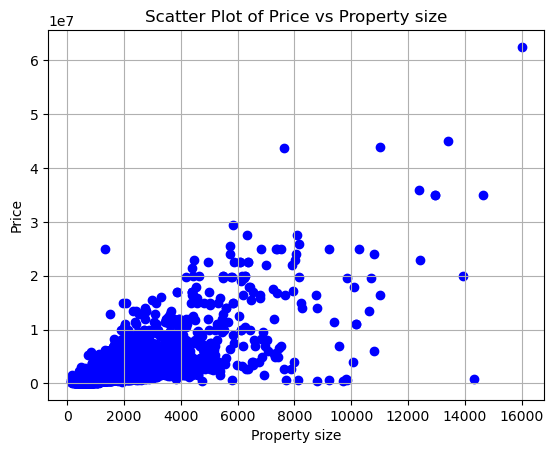

In [384]:
# Scatter plot of price and size
plt.scatter(df_5['property_size'], df_5['price'], color='blue', marker='o')
plt.title('Scatter Plot of Price vs Property size')
plt.xlabel('Property size')
plt.ylabel('Price')
plt.grid(True)

plt.show()

In [303]:
df_5.describe()

,property_id,price,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,lease_time,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
count,54870.000000,5.487000e+04,53689.000000,53148.000000,50209.000000,12535.000000,15087.000000,40847.000000,40847.000000,52762.000000,49578.000000,53009.000000,53009.000000
mean,30492.490177,1.016131e+06,2.523031,1.614341,1.327133,1122.278389,426.758468,51.337696,-0.545702,0.196316,0.293907,0.411085,0.672163
std,17173.883364,1.913882e+06,1.306111,0.916419,0.668653,1003.160730,413.841094,3.012022,8.158463,0.130015,0.165301,0.370743,0.451719
min,1.000000,1.000000e+05,1.000000,1.000000,1.000000,127.000000,1.000000,-43.538994,-123.345200,0.000000,0.000000,0.000000,0.000000
25%,15737.250000,4.000000e+05,2.000000,1.000000,1.000000,610.000000,105.000000,51.456505,-0.223059,0.100000,0.200000,0.200000,0.400000
50%,30282.500000,5.850000e+05,2.000000,1.000000,1.000000,831.000000,143.000000,51.503407,-0.151944,0.200000,0.300000,0.300000,0.600000
75%,45232.750000,9.250000e+05,3.000000,2.000000,1.000000,1249.000000,980.000000,51.553402,-0.066004,0.300000,0.400000,0.500000,0.800000
max,60751.000000,9.900000e+07,22.000000,14.000000,14.000000,16000.000000,3003.000000,57.579407,176.832062,2.100000,2.900000,7.300000,7.300000


In [304]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54870 entries, 0 to 59141
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           54870 non-null  int64  
 1   price                 54870 non-null  float64
 2   house_type            54870 non-null  object 
 3   number_of_bedrooms    53689 non-null  float64
 4   number_of_bathrooms   53148 non-null  float64
 5   number_of_receptions  50209 non-null  float64
 6   property_size         12535 non-null  float64
 7   tenure                54869 non-null  object 
 8   lease_time            15087 non-null  float64
 9   service_charge        28950 non-null  object 
 10  tax_band              54869 non-null  object 
 11  ground_rent           28814 non-null  object 
 12  listing_features      54118 non-null  object 
 13  description_text      54869 non-null  object 
 14  property_link         54870 non-null  object 
 15  postcode           

In [305]:
df_5.to_csv('./Data/london_triple_cleaned.csv', index=False)

In [306]:
df_6 = df_5.copy()

In [307]:
df_6['tenure'].unique()

array(['leasehold', 'freehold', 'not available', 'share of freehold',
       'commonhold', 'feudal', nan], dtype=object)

In [308]:
df_6[df_6['tenure'].isna()]

,property_id,price,house_type,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,tenure,lease_time,service_charge,...,listing_features,description_text,property_link,postcode,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
33183,34789,500000.0,terraced house,4.0,2.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,https://www.zoopla.co.uk/for-sale/details/6494...,SE9,NaN,NaN,NaN,NaN,NaN,NaN


In [309]:
# replace not available to unknown
df_6['tenure'] = df_6['tenure'].apply(lambda x: 'unknown' if x == 'not available' else x)

In [310]:
# drop rows with tenure value as NaN
df_6.dropna(subset=['tenure'], inplace=True)

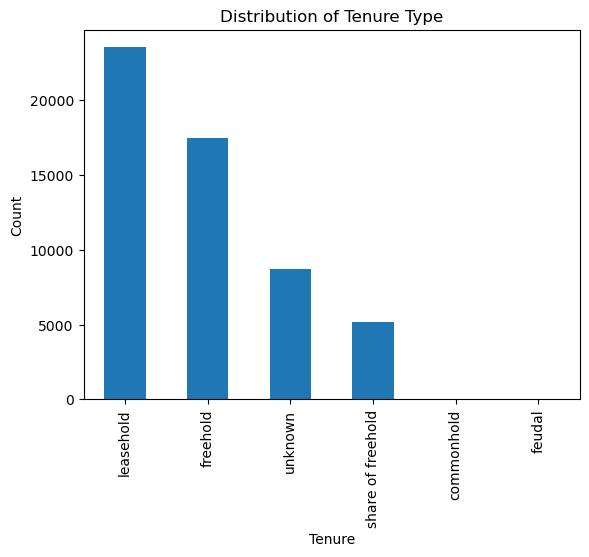

In [311]:
# Plot distribution
df_6['tenure'].value_counts().plot(kind='bar')
plt.title('Distribution of Tenure Type')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

In [312]:
df_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54869 entries, 0 to 59141
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           54869 non-null  int64  
 1   price                 54869 non-null  float64
 2   house_type            54869 non-null  object 
 3   number_of_bedrooms    53688 non-null  float64
 4   number_of_bathrooms   53147 non-null  float64
 5   number_of_receptions  50208 non-null  float64
 6   property_size         12535 non-null  float64
 7   tenure                54869 non-null  object 
 8   lease_time            15087 non-null  float64
 9   service_charge        28950 non-null  object 
 10  tax_band              54869 non-null  object 
 11  ground_rent           28814 non-null  object 
 12  listing_features      54118 non-null  object 
 13  description_text      54869 non-null  object 
 14  property_link         54869 non-null  object 
 15  postcode           

In [313]:
df_7 = df_6.copy()

In [314]:
df_7['lease_time']

0        118.0
1         82.0
2          NaN
3          NaN
4          NaN
         ...  
59137      NaN
59138      NaN
59139      NaN
59140      NaN
59141      NaN
Name: lease_time, Length: 54869, dtype: float64

In [315]:
# assign 0 as lease_time for freehold properties
df_7['lease_time'] = df_7.apply(lambda row: 0 if row['tenure'] == 'freehold' else row['lease_time'], axis=1)

In [316]:
df_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54869 entries, 0 to 59141
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           54869 non-null  int64  
 1   price                 54869 non-null  float64
 2   house_type            54869 non-null  object 
 3   number_of_bedrooms    53688 non-null  float64
 4   number_of_bathrooms   53147 non-null  float64
 5   number_of_receptions  50208 non-null  float64
 6   property_size         12535 non-null  float64
 7   tenure                54869 non-null  object 
 8   lease_time            32534 non-null  float64
 9   service_charge        28950 non-null  object 
 10  tax_band              54869 non-null  object 
 11  ground_rent           28814 non-null  object 
 12  listing_features      54118 non-null  object 
 13  description_text      54869 non-null  object 
 14  property_link         54869 non-null  object 
 15  postcode           

In [317]:
df_7.describe()

,property_id,price,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,lease_time,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
count,54869.000000,5.486900e+04,53688.000000,53147.000000,50208.000000,12535.000000,32534.000000,40847.000000,40847.000000,52762.000000,49578.000000,53009.000000,53009.000000
mean,30492.411872,1.016141e+06,2.523003,1.614334,1.327139,1122.278389,197.660909,51.337696,-0.545702,0.196316,0.293907,0.411085,0.672163
std,17174.030070,1.913899e+06,1.306108,0.916426,0.668658,1003.160730,352.945883,3.012022,8.158463,0.130015,0.165301,0.370743,0.451719
min,1.000000,1.000000e+05,1.000000,1.000000,1.000000,127.000000,0.000000,-43.538994,-123.345200,0.000000,0.000000,0.000000,0.000000
25%,15737.000000,4.000000e+05,2.000000,1.000000,1.000000,610.000000,0.000000,51.456505,-0.223059,0.100000,0.200000,0.200000,0.400000
50%,30282.000000,5.850000e+05,2.000000,1.000000,1.000000,831.000000,0.000000,51.503407,-0.151944,0.200000,0.300000,0.300000,0.600000
75%,45233.000000,9.250000e+05,3.000000,2.000000,1.000000,1249.000000,127.000000,51.553402,-0.066004,0.300000,0.400000,0.500000,0.800000
max,60751.000000,9.900000e+07,22.000000,14.000000,14.000000,16000.000000,3003.000000,57.579407,176.832062,2.100000,2.900000,7.300000,7.300000


In [318]:
df_8 = df_7.copy()

In [319]:
df_8['service_charge'].unique()

array(['Not available', '816', nan, ..., '915', '851', '229'],
      dtype=object)

In [320]:
# converting column to numeric
df_8['service_charge'] = pd.to_numeric(df_8['service_charge'], errors='coerce')

In [321]:
df_8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54869 entries, 0 to 59141
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           54869 non-null  int64  
 1   price                 54869 non-null  float64
 2   house_type            54869 non-null  object 
 3   number_of_bedrooms    53688 non-null  float64
 4   number_of_bathrooms   53147 non-null  float64
 5   number_of_receptions  50208 non-null  float64
 6   property_size         12535 non-null  float64
 7   tenure                54869 non-null  object 
 8   lease_time            32534 non-null  float64
 9   service_charge        11593 non-null  float64
 10  tax_band              54869 non-null  object 
 11  ground_rent           28814 non-null  object 
 12  listing_features      54118 non-null  object 
 13  description_text      54869 non-null  object 
 14  property_link         54869 non-null  object 
 15  postcode           

In [322]:
df_9 = df_8.copy()

In [323]:
df_9['tax_band'].unique()

array(['C', 'B', 'E', 'G', 'D', 'Not available',
       'A band has not yet been confirmed.', 'F', 'H', 'New build', 'A',
       'TBC', 'Not built yet', 'To be assessed',
       'A band has not yet been assigned',
       'A band has not been assigned yet', 'Awaiting banding',
       'Not yet assigned', 'New Build',
       'Not yet assessed for council tax', 'NEW BUILT', 'OFF - PLAN',
       'Band has not been assigned yet', 'To be determined',
       'NOT ASSIGNED', 'I', 'A band has not been assigned as yet',
       'new property', 'Band not yet assigned', 'Not been issued yet',
       'Awaiting Banding', 'A Band Has Not Been Assigned Yet', 'Unknown',
       'Under Construction'], dtype=object)

In [324]:
tax_bands = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

def fix_tax_band(text):
    if isinstance(text, str):
        text = text.lower()
        if text in tax_bands:
            text = text.upper()
        elif (text == 'a band has not yet been assigned' or text == 'a band has not been assigned yet' or 
              text == 'a band has not yet been confirmed.' or text == 'not available' or text == 'tbc'
             or text == 'to be assessed' or text == 'awaiting banding' or text == 'not yet assigned' or
             text == 'not yet assessed for council tax' or text == 'band has not been assigned yet' or
             text == 'to be determined' or text == 'not assigned' or text == 'a band has not been assigned as yet' or
             text == 'band not yet assigned' or text == 'a band has not been assigned' or text == 'not been issued yet'
             or text == 'awaiting banding' or 'a band has not been assigned yet' or text == 'unknown'):
            text = 'unknown'
        else:
            text = np.nan
    else:
        text = np.nan
    return text
df_9['tax_band'] = df_9['tax_band'].apply(fix_tax_band)

In [325]:
df_9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54869 entries, 0 to 59141
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           54869 non-null  int64  
 1   price                 54869 non-null  float64
 2   house_type            54869 non-null  object 
 3   number_of_bedrooms    53688 non-null  float64
 4   number_of_bathrooms   53147 non-null  float64
 5   number_of_receptions  50208 non-null  float64
 6   property_size         12535 non-null  float64
 7   tenure                54869 non-null  object 
 8   lease_time            32534 non-null  float64
 9   service_charge        11593 non-null  float64
 10  tax_band              54869 non-null  object 
 11  ground_rent           28814 non-null  object 
 12  listing_features      54118 non-null  object 
 13  description_text      54869 non-null  object 
 14  property_link         54869 non-null  object 
 15  postcode           

In [326]:
df_10 = df_9.copy()

In [327]:
df_10['ground_rent'].unique()

array(['640', '250', nan, 'Not available', '150', '50', '300', '350',
       '225', '10', '200', '400', '100', '80', '450', '125', '0', '60',
       '30', '38', '600', '6', '175', '1973', '160', '270', '120', '190',
       '334', '241', '259', '336', '180', '256', '1', '75', '240', '276',
       '97', '258', '20', '475', '25', '206', '260', '261', '208', '7',
       '370', '173', '31', '185', '279', '210', '375', '500', '40', '650',
       '495', '478', '340', '410', '230', '558', '264', '15', '248',
       '275', '5', '85', '118', '360', '330', '318', '13', '595', '4',
       '70', '104', '780', '170', '90', '325', '425', '338', '1200',
       '4800', '454', '280', '809', '284', '45', '17', '146', '183',
       '274', '702', '440', '286', '35', '358', '859', '93', '653', '21',
       '271', '363', '422', '130', '434', '519', '520', '36', '9', '750',
       '220', '224', '3%', '605', '324', '320', '302', '700', '455',
       '456', '445', '550', '383', '1%', '10%', '288', '255', '212',

In [328]:
# converting column to numeric
df_10['ground_rent'] = pd.to_numeric(df_10['ground_rent'], errors='coerce')

In [329]:
# assign 0 as ground_rent for freehold properties
df_10['ground_rent'] = df_10.apply(lambda row: 0 if row['tenure'] == 'freehold' else row['ground_rent'], axis=1)

In [330]:
df_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54869 entries, 0 to 59141
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           54869 non-null  int64  
 1   price                 54869 non-null  float64
 2   house_type            54869 non-null  object 
 3   number_of_bedrooms    53688 non-null  float64
 4   number_of_bathrooms   53147 non-null  float64
 5   number_of_receptions  50208 non-null  float64
 6   property_size         12535 non-null  float64
 7   tenure                54869 non-null  object 
 8   lease_time            32534 non-null  float64
 9   service_charge        11593 non-null  float64
 10  tax_band              54869 non-null  object 
 11  ground_rent           25946 non-null  float64
 12  listing_features      54118 non-null  object 
 13  description_text      54869 non-null  object 
 14  property_link         54869 non-null  object 
 15  postcode           

In [331]:
df_11 = df_10.copy()

In [332]:
# converting text to lowercase
df_11['description_text'] = df_11['description_text'].str.lower()
df_11['description_text']

0         guide price £300,000 - £325,000 \n\nthis love...
1        perfect residential or investment property wit...
2        an immaculately presented three bedroom mid te...
3        ref dt0182. a rare to market and substantial v...
4        an exceptional five bedroom detached cottage s...
                               ...                        
59137    this attractive semi detached house requiring ...
59138    a spacious brand new, three bedroom apartment....
59139    a brand new two bedroom balcony apartment situ...
59140    a contemporary one bedroom apartment within a ...
59141    if you are looking for a spacious home which i...
Name: description_text, Length: 54869, dtype: object

In [333]:
# drop rows where listing features are NaN
df_11.dropna(subset=['listing_features'], inplace=True)

In [334]:
df_11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54118 entries, 0 to 59141
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           54118 non-null  int64  
 1   price                 54118 non-null  float64
 2   house_type            54118 non-null  object 
 3   number_of_bedrooms    52960 non-null  float64
 4   number_of_bathrooms   52479 non-null  float64
 5   number_of_receptions  49612 non-null  float64
 6   property_size         12454 non-null  float64
 7   tenure                54118 non-null  object 
 8   lease_time            32534 non-null  float64
 9   service_charge        11578 non-null  float64
 10  tax_band              54118 non-null  object 
 11  ground_rent           25940 non-null  float64
 12  listing_features      54118 non-null  object 
 13  description_text      54118 non-null  object 
 14  property_link         54118 non-null  object 
 15  postcode           

In [335]:
df_12 = df_11.copy()

In [336]:
# drop rows where only property_id, postcode, and property_link are present
cols_to_check = ['property_id', 'postcode', 'property_link']
df_12 = df_12[~(df_12[cols_to_check].notna().all(axis=1) & df_12.drop(columns=cols_to_check).isna().all(axis=1))]

In [337]:
df_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54118 entries, 0 to 59141
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           54118 non-null  int64  
 1   price                 54118 non-null  float64
 2   house_type            54118 non-null  object 
 3   number_of_bedrooms    52960 non-null  float64
 4   number_of_bathrooms   52479 non-null  float64
 5   number_of_receptions  49612 non-null  float64
 6   property_size         12454 non-null  float64
 7   tenure                54118 non-null  object 
 8   lease_time            32534 non-null  float64
 9   service_charge        11578 non-null  float64
 10  tax_band              54118 non-null  object 
 11  ground_rent           25940 non-null  float64
 12  listing_features      54118 non-null  object 
 13  description_text      54118 non-null  object 
 14  property_link         54118 non-null  object 
 15  postcode           

In [348]:
df_13 = df_12.copy()

In [349]:
df_13[df_13.duplicated(subset=['price', 'house_type', 'postcode', 'latitude', 'longitude'])]

,property_id,price,house_type,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,tenure,lease_time,service_charge,...,listing_features,description_text,property_link,postcode,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
74,75,1250000.0,detached house,4.0,3.0,NaN,NaN,freehold,0.0,NaN,...,Freehold\nFour Bedoom Detached House\nGenerous...,"guide price £1,250,000 - £1,350,000\nthis stun...",https://www.zoopla.co.uk/for-sale/details/6502...,BR1,NaN,NaN,NaN,NaN,NaN,NaN
108,109,1300000.0,semi-detached house,4.0,3.0,3.0,NaN,freehold,0.0,NaN,...,Freehold\nBeautiful edwardian semi-detached ho...,we are delighted to offer for sale this simply...,https://www.zoopla.co.uk/for-sale/details/6490...,BR1,51.412449,-0.000960,0.2,0.4,0.2,0.5
152,153,275000.0,flat,2.0,1.0,1.0,NaN,leasehold,NaN,982.0,...,Leasehold\n,brought to the market is this well located two...,https://www.zoopla.co.uk/for-sale/details/6476...,BR1,NaN,NaN,0.2,0.2,0.2,1.3
162,163,1850000.0,detached house,6.0,3.0,3.0,NaN,freehold,0.0,NaN,...,Freehold\nDetached Property\n3 bathrooms\nNo o...,truepenny-s are delighted to present this gene...,https://www.zoopla.co.uk/for-sale/details/6469...,BR1,51.434067,0.045646,0.2,0.3,0.5,0.7
181,182,875000.0,detached house,4.0,2.0,2.0,NaN,freehold,0.0,NaN,...,Freehold\n4 Bedroom Detatcehd Property\nSought...,"guide price £875,000 - £900,000\njdm are delig...",https://www.zoopla.co.uk/for-sale/details/6461...,BR1,NaN,NaN,0.1,0.2,0.2,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59049,60659,280000.0,flat,3.0,1.0,1.0,NaN,unknown,NaN,NaN,...,Large apartment with large double bedrooms\nOp...,this large forth floor apartment is the ideal ...,https://www.zoopla.co.uk/for-sale/details/6187...,CR4,NaN,NaN,0.1,0.2,0.1,0.9
59086,60696,775000.0,detached house,5.0,1.0,2.0,NaN,unknown,NaN,NaN,...,Attractive Detached Family Home\nModernisation...,a striking four/five bedroom detached family h...,https://www.zoopla.co.uk/for-sale/details/6511...,CR5,51.324677,-0.138476,0.1,0.2,0.4,0.7
59091,60701,725000.0,detached house,4.0,2.0,2.0,NaN,freehold,0.0,NaN,...,Freehold\n* Detached Family Home\n* No Chain\n...,"situated on a corner position, this spacious f...",https://www.zoopla.co.uk/for-sale/details/6509...,CR5,NaN,NaN,0.3,0.6,0.2,0.6
59111,60721,725000.0,detached house,4.0,2.0,1.0,NaN,freehold,0.0,NaN,...,Freehold\nFour double bedrooms\nPrivate garden...,eo estate agents are thrilled to introduce to ...,https://www.zoopla.co.uk/new-homes/details/625...,CR5,NaN,NaN,0.4,0.5,0.4,0.5


In [350]:
df_13.loc[74, ['price', 'house_type', 'postcode', 'latitude', 'longitude']]

price              1250000.0
house_type    detached house
postcode                 BR1
latitude                 NaN
longitude                NaN
Name: 74, dtype: object

In [351]:
df_13[(df_13['price'] == 1250000) & (df_13['postcode']=='BR1')]

,property_id,price,house_type,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,tenure,lease_time,service_charge,...,listing_features,description_text,property_link,postcode,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
63,64,1250000.0,detached house,4.0,2.0,4.0,NaN,freehold,0.0,NaN,...,Freehold\nVery well presented family home\nAlm...,"guide price £1,250,000 - £1,300,000.\nhighly a...",https://www.zoopla.co.uk/for-sale/details/6505...,BR1,NaN,NaN,NaN,NaN,NaN,NaN
74,75,1250000.0,detached house,4.0,3.0,NaN,NaN,freehold,0.0,NaN,...,Freehold\nFour Bedoom Detached House\nGenerous...,"guide price £1,250,000 - £1,350,000\nthis stun...",https://www.zoopla.co.uk/for-sale/details/6502...,BR1,NaN,NaN,NaN,NaN,NaN,NaN
86,87,1250000.0,detached house,5.0,3.0,3.0,NaN,freehold,0.0,NaN,...,Freehold\nFive Double Bedrooms\nSpacious Kitch...,a larger than average double fronted five doub...,https://www.zoopla.co.uk/for-sale/details/6497...,BR1,51.397064,0.061958,0.2,0.5,0.6,0.8
98,99,1250000.0,detached house,3.0,1.0,1.0,NaN,freehold,0.0,NaN,...,"Freehold\nThree double bedroom, detached house...",situated on one of the most prestigious in bic...,https://www.zoopla.co.uk/for-sale/details/6494...,BR1,51.403988,0.043397,0.4,0.7,0.1,0.6
102,103,1250000.0,semi-detached house,6.0,2.0,3.0,NaN,freehold,0.0,NaN,...,Freehold\nBeautiful Edwardian family home\nSem...,"guide price £1,250,000 to £1,350,000\n\na prop...",https://www.zoopla.co.uk/for-sale/details/6492...,BR1,51.413052,0.021303,0.3,0.3,0.1,0.3
136,137,1250000.0,detached house,4.0,3.0,3.0,1995.0,unknown,NaN,NaN,...,Gated development\nAdjacent to bickley station...,located in a private gated development is this...,https://www.zoopla.co.uk/for-sale/details/6481...,BR1,51.400433,0.045568,NaN,NaN,NaN,NaN
150,151,1250000.0,detached house,5.0,3.0,3.0,NaN,freehold,0.0,NaN,...,Freehold\nFive Double Bedrooms\nBi-folding Doo...,an immaculate five bedroom detached family hom...,https://www.zoopla.co.uk/for-sale/details/6476...,BR1,51.397774,0.060529,0.2,0.6,0.6,0.7
232,233,1250000.0,detached house,5.0,2.0,NaN,NaN,freehold,0.0,NaN,...,Freehold\nGated setting\nLarge 2830 sq ft + ga...,less than a 10 minute walk to the bullers wood...,https://www.zoopla.co.uk/for-sale/details/6173...,BR1,NaN,NaN,NaN,NaN,NaN,NaN


In [352]:
df_13.loc[150, 'property_link']

'https://www.zoopla.co.uk/for-sale/details/64766242/?search_identifier=180b3920c900ec05516f3096fe81d5394bc9636868dc9aa58227c2ad747729a2'

In [353]:
# add address to eliminate duplicate values
df_13 = pd.merge(df_13, df_original[['property_id', 'address']], on='property_id', how='left').copy()

In [354]:
df_13

,property_id,price,house_type,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,tenure,lease_time,service_charge,...,description_text,property_link,postcode,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance,address
0,1,300000.0,flat,1.0,1.0,1.0,650.0,leasehold,118.0,NaN,...,"guide price £300,000 - £325,000 \n\nthis love...",https://www.zoopla.co.uk/for-sale/details/6275...,BR1,51.401890,0.015865,0.2,0.2,0.2,0.5,"Ringers Road, Bromley BR1"
1,2,125000.0,studio,NaN,1.0,1.0,NaN,leasehold,82.0,816.0,...,perfect residential or investment property wit...,https://www.zoopla.co.uk/for-sale/details/6521...,BR1,NaN,NaN,0.1,0.1,0.4,1.0,"Downham Way, Bromley, Kent BR1"
2,3,595000.0,terraced house,3.0,2.0,1.0,NaN,freehold,0.0,NaN,...,an immaculately presented three bedroom mid te...,https://www.zoopla.co.uk/for-sale/details/6520...,BR1,51.411739,0.036798,0.3,0.3,0.5,0.7,"Rolvenden Gardens, Bromley BR1"
3,4,1475000.0,detached house,7.0,6.0,3.0,NaN,freehold,0.0,NaN,...,ref dt0182. a rare to market and substantial v...,https://www.zoopla.co.uk/for-sale/details/6420...,BR1,51.409714,0.026188,0.1,0.2,0.4,0.4,"Upper Park Road, Bromley BR1"
4,5,1499950.0,detached house,5.0,1.0,1.0,NaN,freehold,0.0,NaN,...,an exceptional five bedroom detached cottage s...,https://www.zoopla.co.uk/for-sale/details/6520...,BR1,51.416840,0.025992,0.4,0.5,0.4,0.7,"Garden Lane, Bromley BR1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54113,60747,500000.0,semi-detached house,2.0,1.0,2.0,NaN,unknown,NaN,NaN,...,this attractive semi detached house requiring ...,https://www.zoopla.co.uk/for-sale/details/6490...,CR5,51.306942,-0.119828,0.3,0.4,1.3,1.6,"Coulsdon Road, Coulsdon CR5"
54114,60748,495000.0,flat,3.0,2.0,1.0,NaN,unknown,NaN,NaN,...,"a spacious brand new, three bedroom apartment....",https://www.zoopla.co.uk/new-homes/details/648...,CR5,51.324013,-0.136046,0.4,0.5,0.2,0.6,"South Drive, Coulsdon CR5"
54115,60749,425000.0,flat,2.0,1.0,1.0,NaN,unknown,NaN,NaN,...,a brand new two bedroom balcony apartment situ...,https://www.zoopla.co.uk/new-homes/details/648...,CR5,51.324013,-0.136046,0.4,0.5,0.2,0.6,"South Drive, Coulsdon CR5"
54116,60750,320000.0,flat,1.0,1.0,1.0,NaN,unknown,NaN,NaN,...,a contemporary one bedroom apartment within a ...,https://www.zoopla.co.uk/new-homes/details/648...,CR5,51.324013,-0.136046,0.4,0.5,0.2,0.6,"South Drive, Coulsdon CR5"


In [355]:
df_13[df_13.duplicated(subset=['price', 'house_type', 'postcode', 'latitude', 'longitude', 'address'])]

,property_id,price,house_type,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,tenure,lease_time,service_charge,...,description_text,property_link,postcode,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance,address
106,109,1300000.0,semi-detached house,4.0,3.0,3.0,NaN,freehold,0.0,NaN,...,we are delighted to offer for sale this simply...,https://www.zoopla.co.uk/for-sale/details/6490...,BR1,51.412449,-0.000960,0.2,0.4,0.2,0.5,"Farnaby Road, Bromley BR1"
160,163,1850000.0,detached house,6.0,3.0,3.0,NaN,freehold,0.0,NaN,...,truepenny-s are delighted to present this gene...,https://www.zoopla.co.uk/for-sale/details/6469...,BR1,51.434067,0.045646,0.2,0.3,0.5,0.7,"Avondale Road, Bromley BR1"
181,187,400000.0,flat,2.0,2.0,1.0,NaN,leasehold,NaN,NaN,...,yopa is proud to market this fabulously charmi...,https://www.zoopla.co.uk/for-sale/details/6285...,BR1,51.413052,0.021303,0.2,0.2,0.1,0.4,"Lansdowne Road, Bromley BR1"
198,204,2000000.0,detached house,5.0,1.0,2.0,NaN,freehold,0.0,NaN,...,a unique award winning 5/6 bedroom detached fa...,https://www.zoopla.co.uk/for-sale/details/6337...,BR1,51.397186,0.047646,0.4,0.4,0.2,0.7,"Timms Close, Bromley BR1"
243,251,1050000.0,detached house,5.0,3.0,1.0,NaN,freehold,0.0,NaN,...,offered to the market in pristine condition is...,https://www.zoopla.co.uk/for-sale/details/6411...,BR1,51.415718,0.006195,0.2,0.5,0.5,0.6,"London Lane, Bromley BR1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53994,60606,425000.0,end terrace house,3.0,1.0,1.0,NaN,freehold,0.0,NaN,...,summary\nno onward chain a fantastic 3 double ...,https://www.zoopla.co.uk/for-sale/details/6409...,CR4,51.405254,-0.168574,0.2,NaN,0.1,1.0,"Taffy's How, Mitcham CR4"
54005,60619,400000.0,maisonette,3.0,1.0,1.0,NaN,freehold,0.0,NaN,...,"vendor comments ""we have lived here for just o...",https://www.zoopla.co.uk/for-sale/details/6390...,CR4,51.417007,-0.159320,0.2,0.4,0.2,0.7,"Tynemouth Road, Mitcham CR4"
54030,60649,375000.0,maisonette,2.0,2.0,1.0,NaN,share of freehold,NaN,NaN,...,a fabulous split level flat situated close to ...,https://www.zoopla.co.uk/for-sale/details/6107...,CR4,51.417023,-0.150929,0.3,0.3,0.5,0.6,"Caithness Road, Mitcham CR4"
54035,60656,200000.0,flat,1.0,1.0,1.0,NaN,leasehold,125.0,600.0,...,detailed description\n\nattention all first ti...,https://www.zoopla.co.uk/for-sale/details/6196...,CR4,51.402302,-0.178332,0.2,0.2,0.7,1.0,"Gale Close, Mitcham CR4"


In [356]:
# dropping duplicated values
df_13 = df_13.drop_duplicates(subset=['price', 'house_type', 'postcode', 'latitude', 'longitude', 'address'])

In [357]:
df_13.drop(columns=['address'], inplace=True)

C:\Users\kenim\AppData\Local\Temp\ipykernel_19524\2449417770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_13.drop(columns=['address'], inplace=True)


In [358]:
df_13.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50525 entries, 0 to 54117
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           50525 non-null  int64  
 1   price                 50525 non-null  float64
 2   house_type            50525 non-null  object 
 3   number_of_bedrooms    49414 non-null  float64
 4   number_of_bathrooms   48997 non-null  float64
 5   number_of_receptions  46345 non-null  float64
 6   property_size         11667 non-null  float64
 7   tenure                50525 non-null  object 
 8   lease_time            30501 non-null  float64
 9   service_charge        10857 non-null  float64
 10  tax_band              50525 non-null  object 
 11  ground_rent           24410 non-null  float64
 12  listing_features      50525 non-null  object 
 13  description_text      50525 non-null  object 
 14  property_link         50525 non-null  object 
 15  postcode           

In [359]:
df_14 = df_13.copy()

## Handling Missing data

In [360]:
def save_plot_to_png(plot_name):
    """
    Save the current plot to a PNG file.
    
    Parameters:
    - plot_name: The name to give the saved plot (without the .png extension).
    """
    
    directory = './Data/plots/london/'
    
    # Ensure the directory exists
    if not os.path.exists(directory):
        os.makedirs(directory)
        
    # Save the plot
    fig = plt.gcf()
    plt.tight_layout()
    plt.savefig(f'{directory}{plot_name}.png', dpi=300)

In [361]:
# List of numerical columns
numerical_cols = ['price', 'number_of_bedrooms', 'number_of_bathrooms', 'number_of_receptions', 'property_size', 'lease_time', 
                  'service_charge','ground_rent', 'latitude', 'longitude', 'school_1_distance', 'school_2_distance', 
                  'train_1_distance', 'train_2_distance']

In [362]:
len(numerical_cols)

14

### Mean imputation

In [363]:
df_mean = df_14.copy()

for colmun in numerical_cols:
    df_mean[colmun].fillna(df_mean[colmun].mean(), inplace=True)

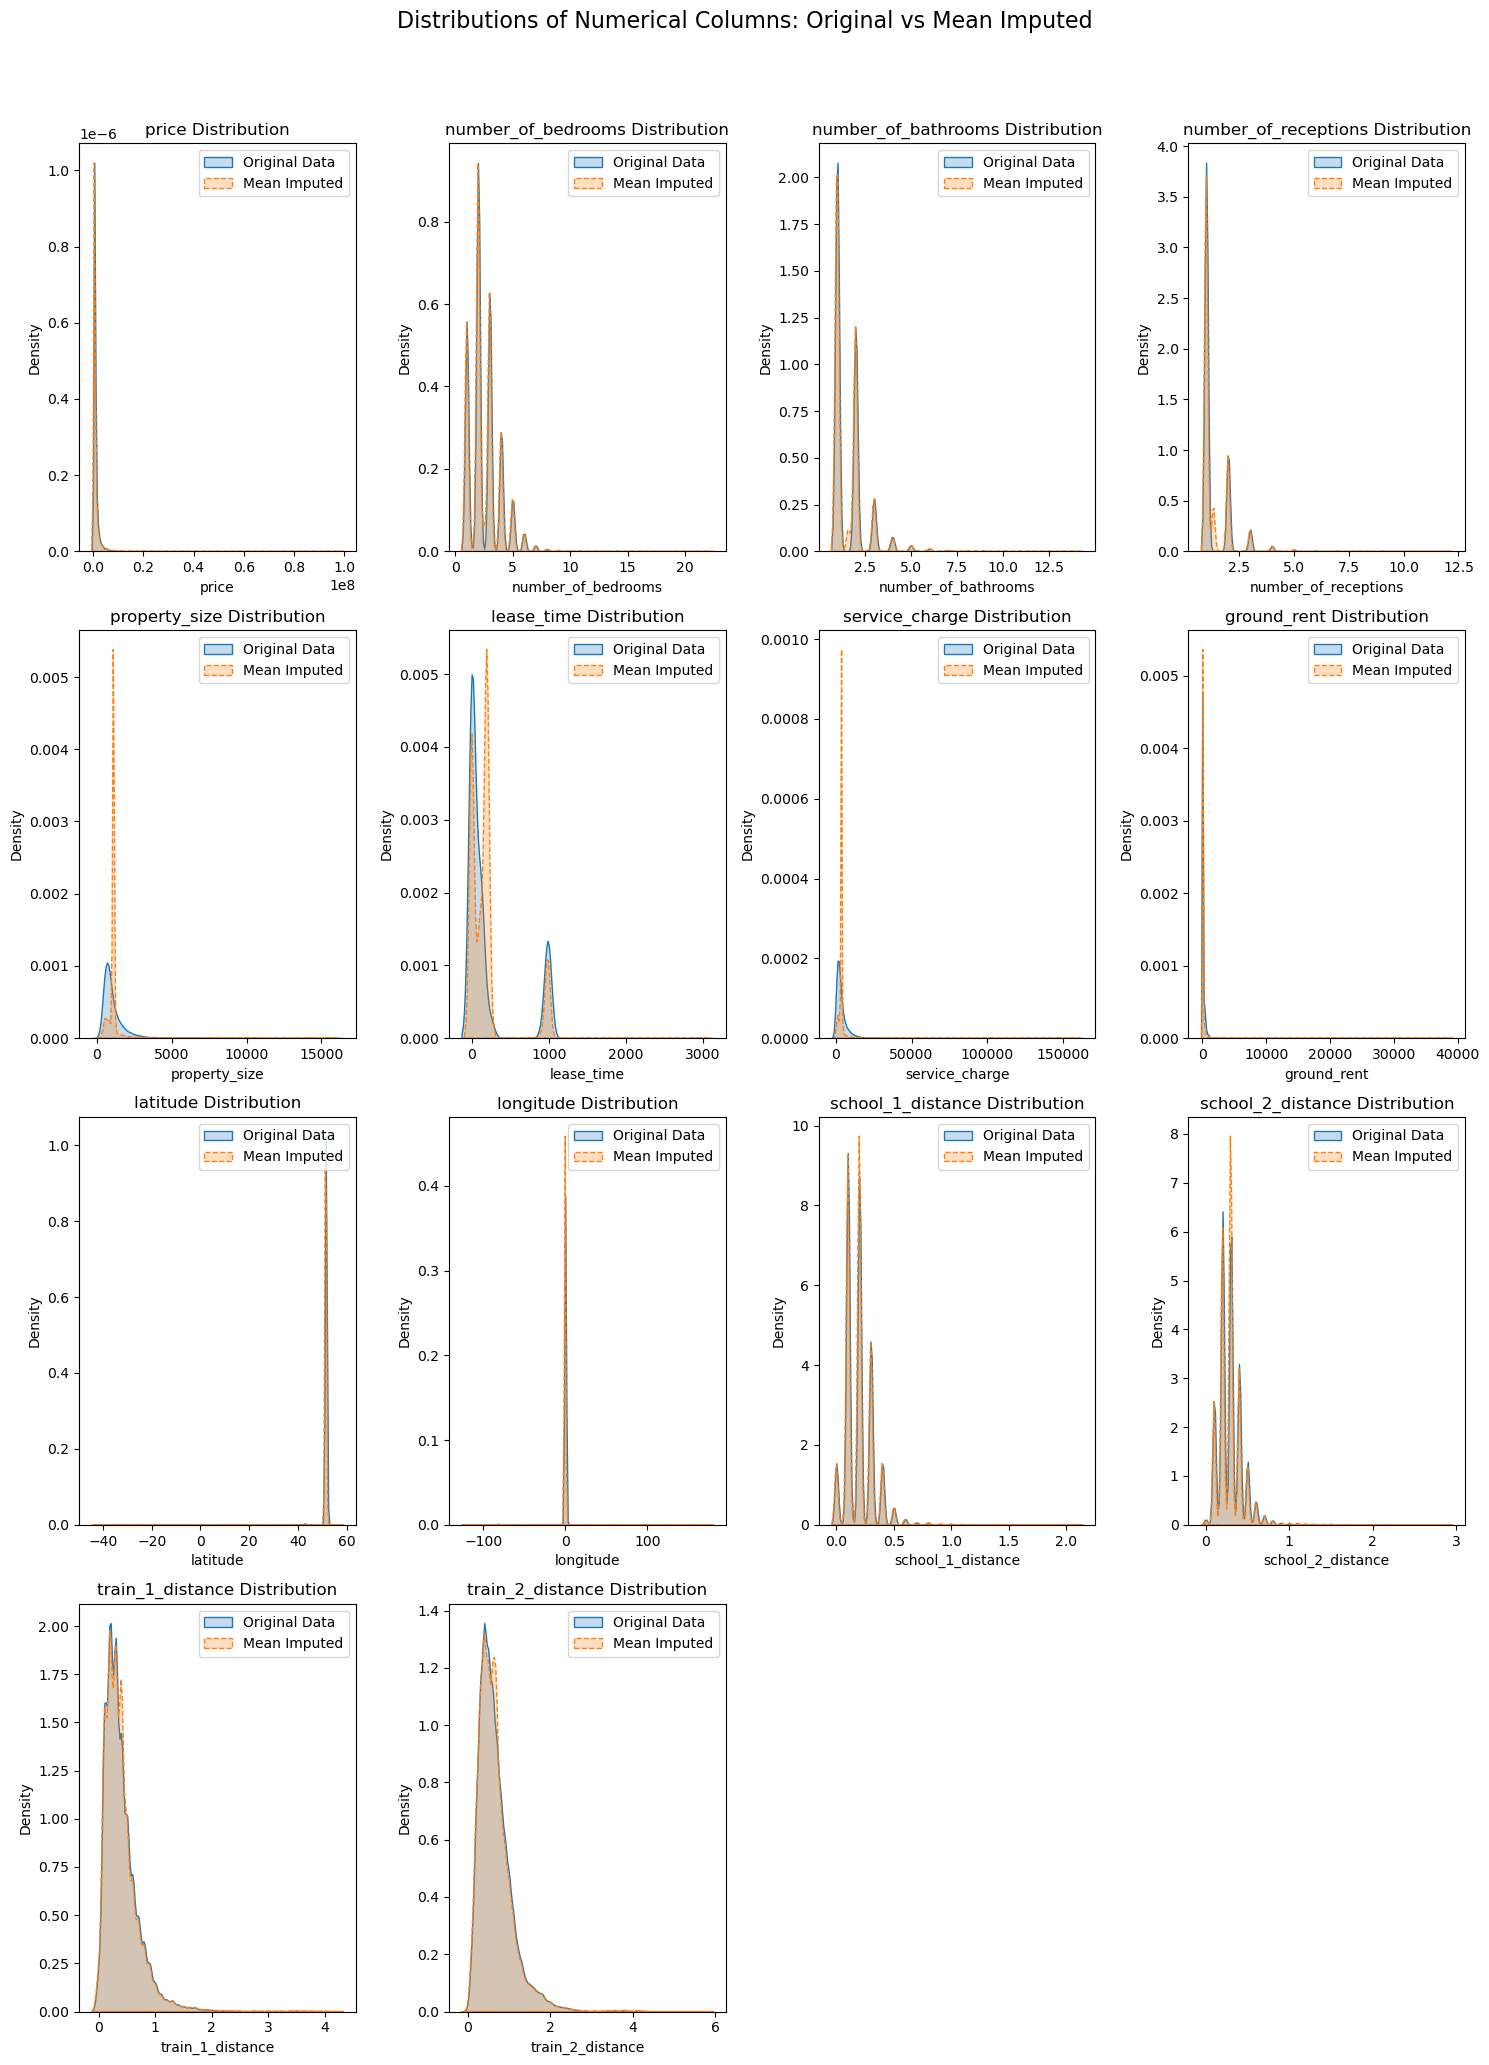

In [364]:
# Plotting
fig, axs = plt.subplots(nrows=4, ncols= 4, figsize=(15, 20))

for i, col in enumerate(numerical_cols):
    row = i // 4
    col = i % 4
    sns.kdeplot(df_14[numerical_cols[i]], ax=axs[row, col], label='Original Data', shade=True)
    sns.kdeplot(df_mean[numerical_cols[i]], ax=axs[row, col], label='Mean Imputed', shade=True, linestyle='--')
    axs[row, col].set_title(f'{numerical_cols[i]} Distribution')
    axs[row, col].legend()

# # Clear the last two subplots
for i in [2, 3]:
    axs[3, i].axis('off')

plt.tight_layout()
plt.suptitle('Distributions of Numerical Columns: Original vs Mean Imputed', y=1.03, fontsize=16)
save_plot_to_png('Distributions of Numerical Columns_Original vs Mean Imputed')
plt.show()

### Complex imputation (KNN)

In [365]:
# Create a copy to work with
df_knn = df_14.copy()

# 1. Normalize the data

# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Selecting only the numerical columns for normalization, excluding 'property_id'
numerical_cols = df_knn.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = [col for col in numerical_cols if col != 'property_id']

# Apply the scaler to the selected numerical columns
df_knn[numerical_cols] = scaler.fit_transform(df_knn[numerical_cols])

# 2. Impute the missing values using KNN

# Instantiate the KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Impute the normalized data
df_knn[numerical_cols] = imputer.fit_transform(df_knn[numerical_cols])

# 3. Inverse transform the normalized and imputed data
df_knn[numerical_cols] = scaler.inverse_transform(df_knn[numerical_cols])

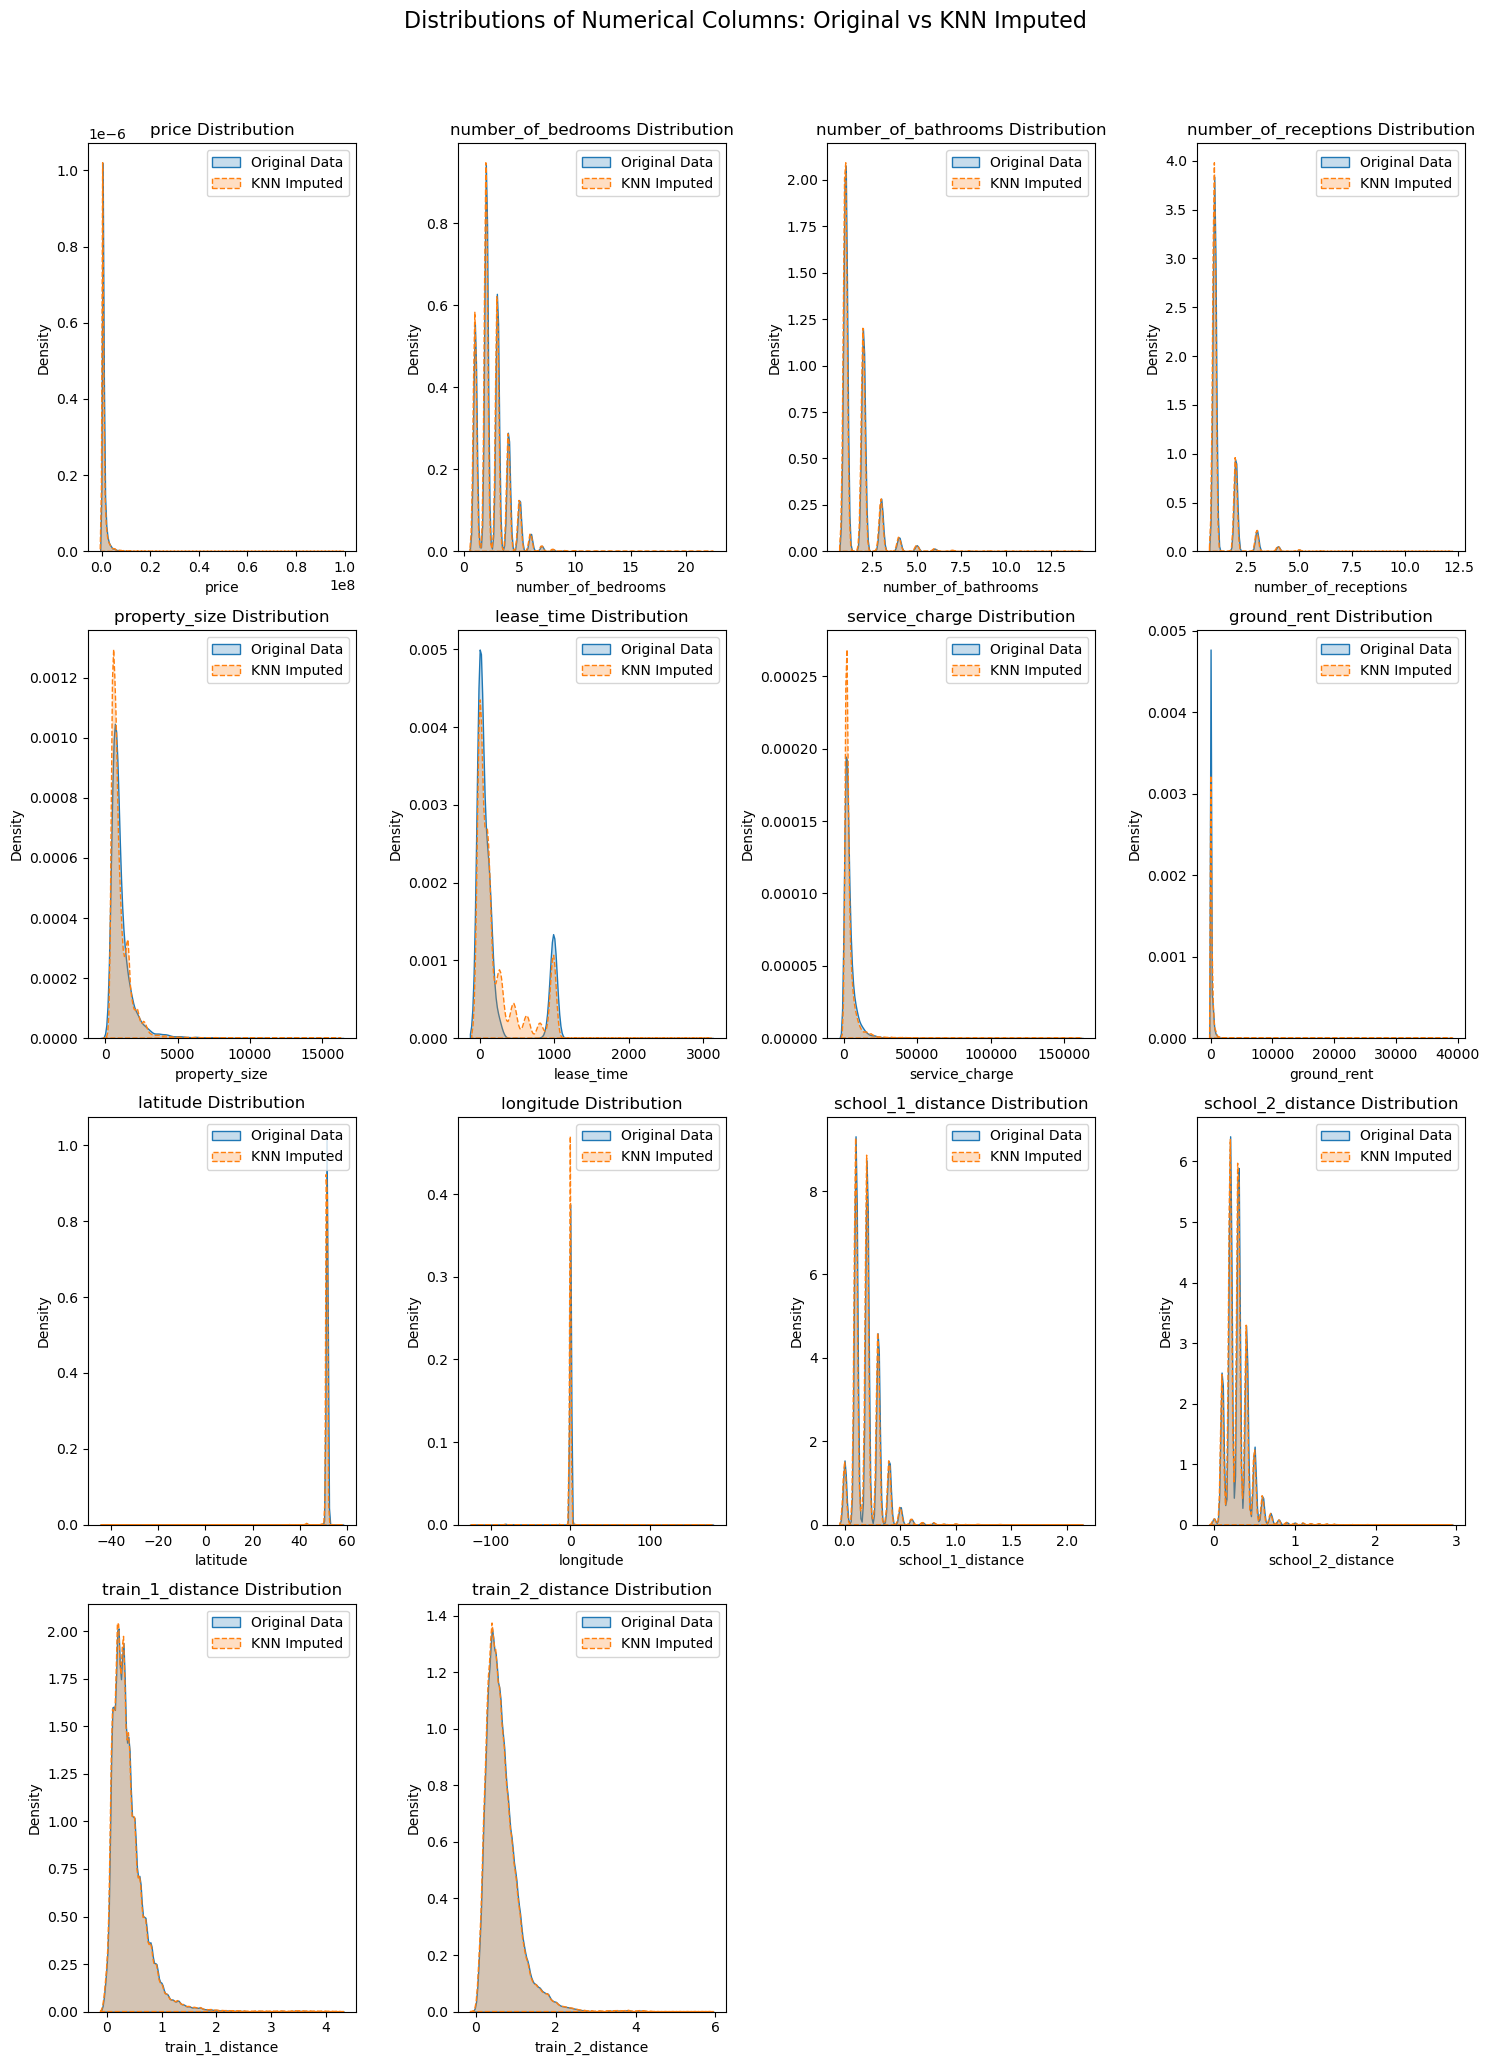

In [385]:
# Plotting
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 20))

for i, col in enumerate(numerical_cols):
    row = i // 4
    col = i % 4
    sns.kdeplot(df_14[numerical_cols[i]], ax=axs[row, col], label='Original Data', shade=True)
    sns.kdeplot(df_knn[numerical_cols[i]], ax=axs[row, col], label='KNN Imputed', shade=True, linestyle='--')
    axs[row, col].set_title(f'{numerical_cols[i]} Distribution')
    axs[row, col].legend()

# # Clear the last two subplots
for i in [2, 3]:
    axs[3, i].axis('off')
    
plt.tight_layout()
plt.suptitle('Distributions of Numerical Columns: Original vs KNN Imputed', y=1.03, fontsize=16)
save_plot_to_png('Distributions of Numerical Columns_Original vs KNN Imputed')
plt.show()

### Complex Imputation (MICE)

In [367]:
# Make a copy of the data
df_mice = df_14.copy()

# Normalize the data
scaler = MinMaxScaler()
numerical_cols = df_mice.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = [col for col in numerical_cols if col != 'property_id']
df_mice[numerical_cols] = scaler.fit_transform(df_mice[numerical_cols])

# MICE Imputation
imputer = IterativeImputer(max_iter=10, random_state=42)
df_mice[numerical_cols] = imputer.fit_transform(df_mice[numerical_cols])

# Inverse transform
df_mice[numerical_cols] = scaler.inverse_transform(df_mice[numerical_cols])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


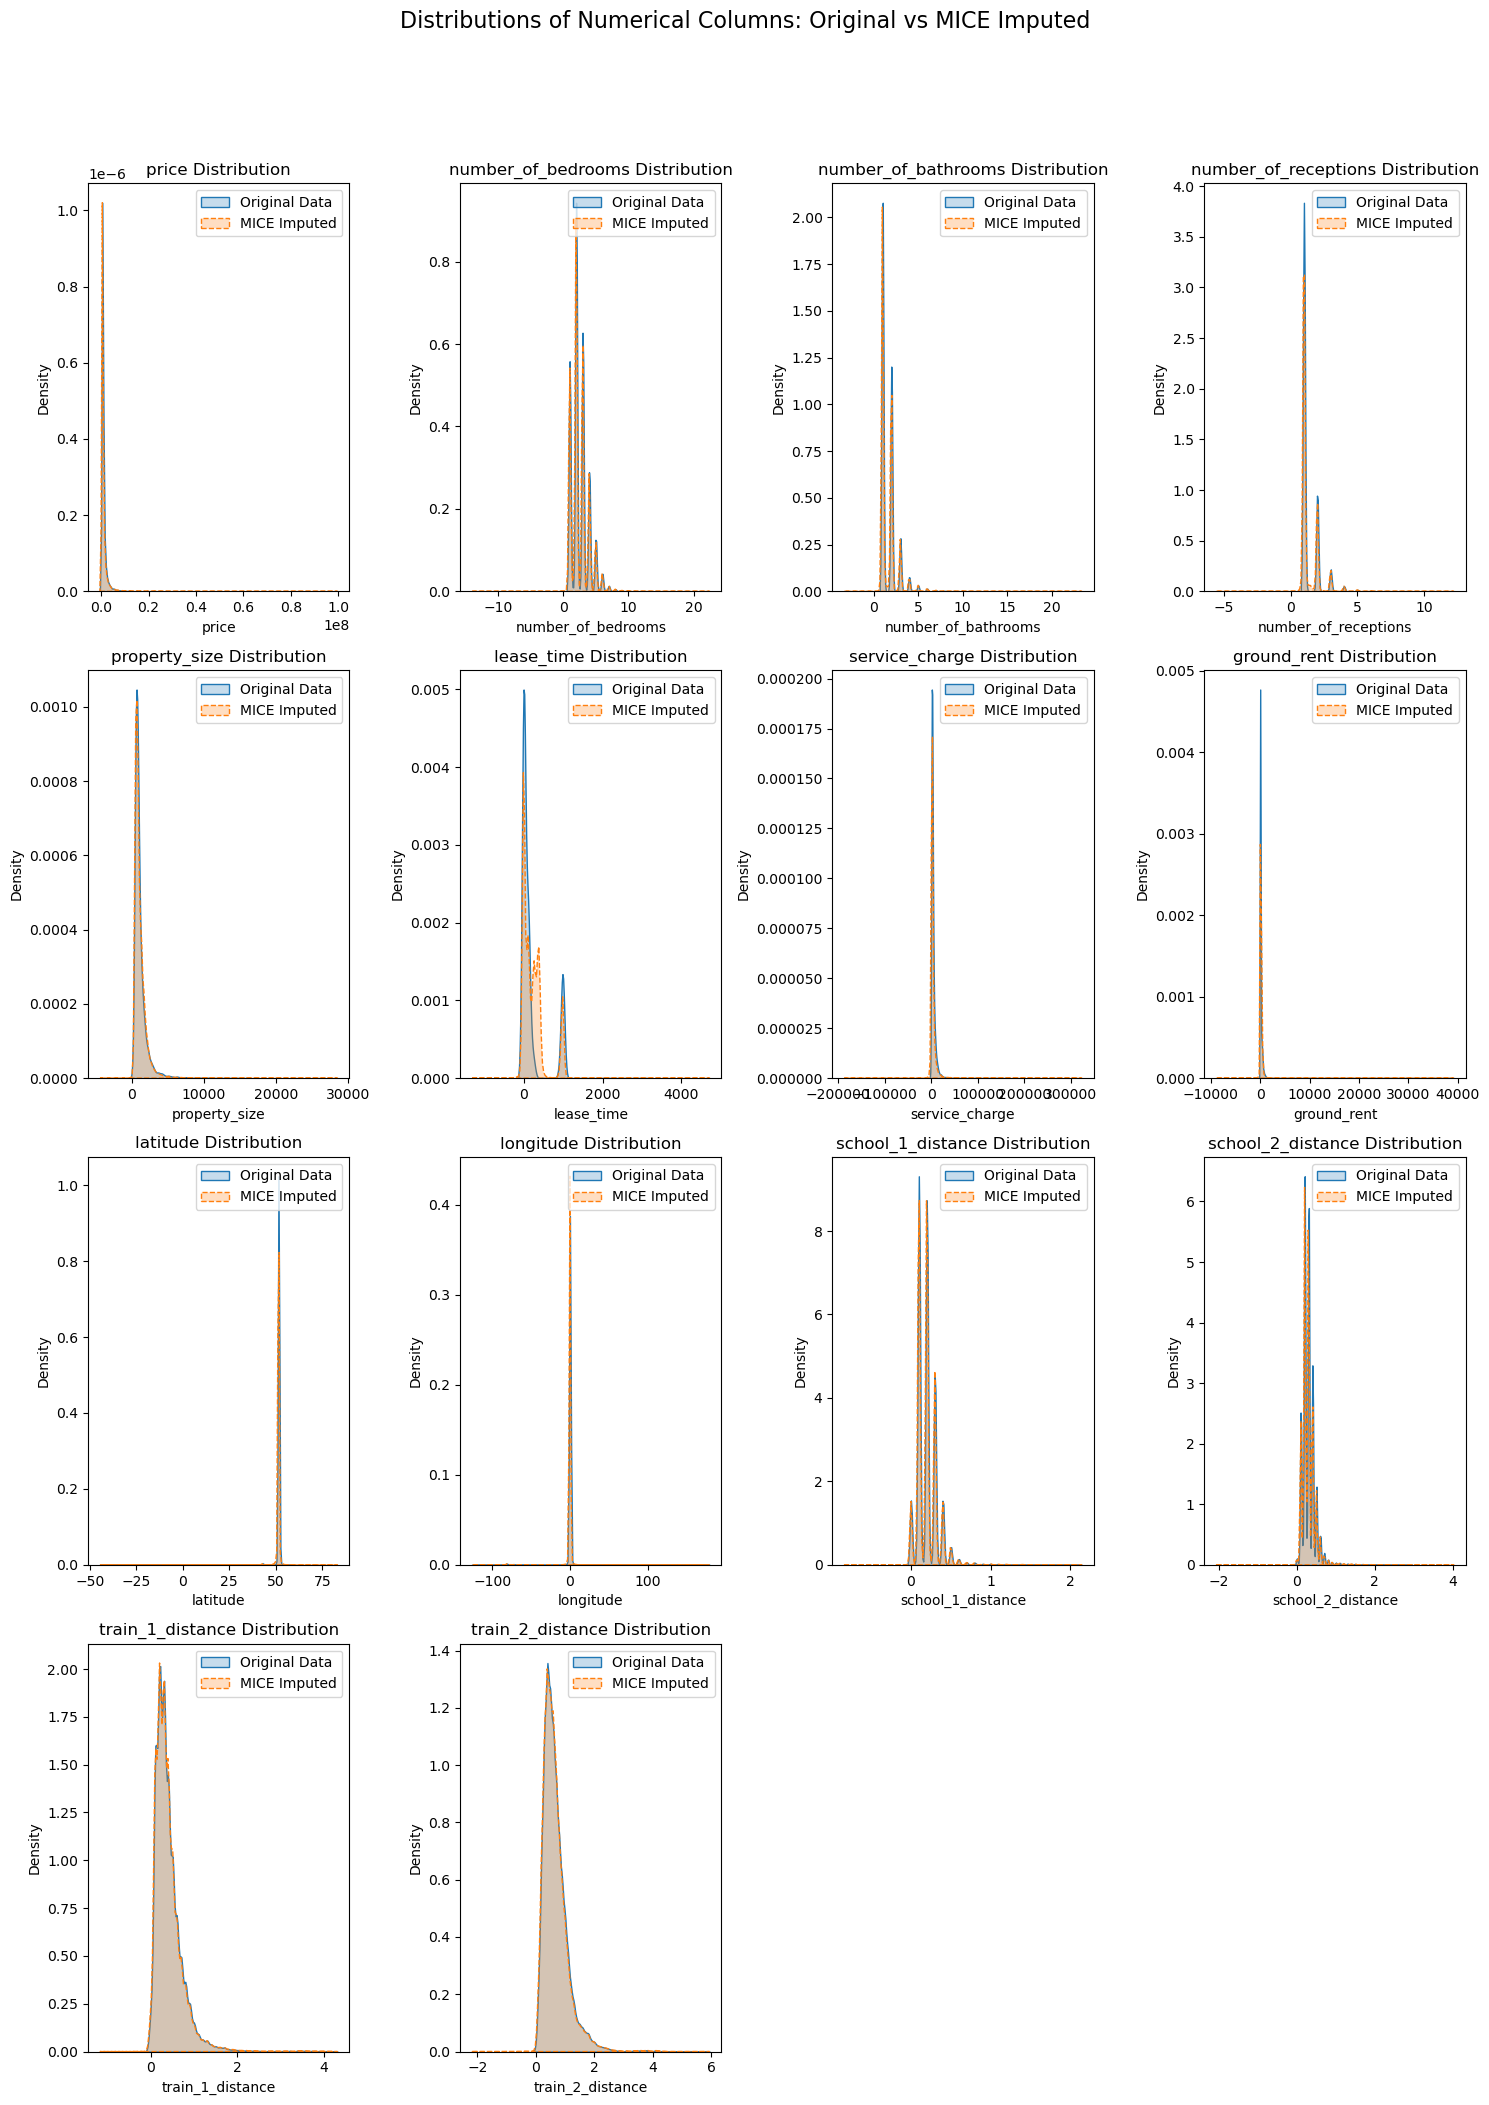

In [368]:
# Plotting
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 20))

for i, col in enumerate(numerical_cols):
    row = i // 4
    col = i % 4
    sns.kdeplot(df_14[numerical_cols[i]], ax=axs[row, col], label='Original Data', shade=True)
    sns.kdeplot(df_mice[numerical_cols[i]], ax=axs[row, col], label='MICE Imputed', shade=True, linestyle='--')
    axs[row, col].set_title(f'{numerical_cols[i]} Distribution')
    axs[row, col].legend()

# Clear the last two subplots
for i in [2, 3]:
    axs[3, i].axis('off')

plt.tight_layout()
plt.suptitle('Distributions of Numerical Columns: Original vs MICE Imputed', y=1.05, fontsize=16)
save_plot_to_png('Distributions of Numerical Columns_Original vs MICE Imputed')
plt.show()

In [369]:
# rounding values
df_knn['number_of_bedrooms'] = df_knn['number_of_bedrooms'].apply(round)
df_knn['number_of_bathrooms'] = df_knn['number_of_bathrooms'].apply(round)
df_knn['number_of_receptions'] = df_knn['number_of_receptions'].apply(round)

In [370]:
df_knn.describe()

,property_id,price,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,lease_time,service_charge,ground_rent,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
count,50525.00000,5.052500e+04,50525.000000,50525.000000,50525.000000,50525.000000,50525.000000,50525.000000,50525.000000,50525.000000,50525.000000,50525.000000,50525.000000,50525.000000,50525.000000
mean,30366.14290,1.003977e+06,2.508006,1.607382,1.321564,1057.374109,226.287466,3899.114917,172.885546,51.343304,-0.484999,0.195657,0.292855,0.405701,0.664932
std,17214.48758,1.891108e+06,1.306413,0.915526,0.660634,803.568362,317.153801,5591.203759,431.673503,2.674788,7.216823,0.126699,0.157574,0.352154,0.433967
min,1.00000,1.000000e+05,1.000000,1.000000,1.000000,127.000000,0.000000,0.000000,0.000000,-43.538994,-123.345200,0.000000,0.000000,0.000000,0.000000
25%,15485.00000,4.000000e+05,2.000000,1.000000,1.000000,585.200000,0.000000,1588.800000,0.000000,51.462440,-0.208627,0.100000,0.200000,0.200000,0.400000
50%,30387.00000,5.850000e+05,2.000000,1.000000,1.000000,793.200000,99.000000,2352.400000,71.200000,51.502373,-0.147353,0.200000,0.300000,0.300000,0.600000
75%,45122.00000,9.150000e+05,3.000000,2.000000,1.000000,1267.000000,281.600000,4000.000000,244.400000,51.540256,-0.074989,0.300000,0.400000,0.500000,0.800000
max,60751.00000,9.900000e+07,22.000000,14.000000,12.000000,16000.000000,3003.000000,160000.000000,39000.000000,57.579407,176.832062,2.100000,2.900000,4.200000,5.800000


In [371]:
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50525 entries, 0 to 54117
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           50525 non-null  int64  
 1   price                 50525 non-null  float64
 2   house_type            50525 non-null  object 
 3   number_of_bedrooms    50525 non-null  int64  
 4   number_of_bathrooms   50525 non-null  int64  
 5   number_of_receptions  50525 non-null  int64  
 6   property_size         50525 non-null  float64
 7   tenure                50525 non-null  object 
 8   lease_time            50525 non-null  float64
 9   service_charge        50525 non-null  float64
 10  tax_band              50525 non-null  object 
 11  ground_rent           50525 non-null  float64
 12  listing_features      50525 non-null  object 
 13  description_text      50525 non-null  object 
 14  property_link         50525 non-null  object 
 15  postcode           

In [372]:
def remove_outliers(df):
    """
    Remove outliers from a dataframe based on the IQR, Z-Score, and 1-percentile of its numerical columns.
    Observations are removed only if they are considered outliers by all three methods.
    
    Args:
    - df (pd.DataFrame): Input DataFrame
    
    Returns:
    - pd.DataFrame: DataFrame with outliers removed
    """
    # Copy the dataframe
    df_out = df.copy()
    
    # For each numerical column, compute the IQR, Z-Score and filter out outliers
    for col in df_out.select_dtypes(include=['number']).columns:
        # IQR method
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        iqr_outliers = (df_out[col] < (Q1 - 1.5 * IQR)) | (df_out[col] > (Q3 + 1.5 * IQR))
        
        # Z-Score method
        z_scores = zscore(df_out[col].dropna())
        z_outliers = (np.abs(z_scores) > 3)
        
        # 1-percentile method
        lower_bound = df_out[col].quantile(0.01)
        upper_bound = df_out[col].quantile(0.99)
        percentile_outliers = (df_out[col] < lower_bound) | (df_out[col] > upper_bound)
        
        # Combine the methods
        combined_outliers = iqr_outliers & z_outliers & percentile_outliers
        df_out = df_out[~combined_outliers]
        
    return df_out

df_new = remove_outliers(df_knn)

In [373]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45870 entries, 0 to 54117
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           45870 non-null  int64  
 1   price                 45870 non-null  float64
 2   house_type            45870 non-null  object 
 3   number_of_bedrooms    45870 non-null  int64  
 4   number_of_bathrooms   45870 non-null  int64  
 5   number_of_receptions  45870 non-null  int64  
 6   property_size         45870 non-null  float64
 7   tenure                45870 non-null  object 
 8   lease_time            45870 non-null  float64
 9   service_charge        45870 non-null  float64
 10  tax_band              45870 non-null  object 
 11  ground_rent           45870 non-null  float64
 12  listing_features      45870 non-null  object 
 13  description_text      45870 non-null  object 
 14  property_link         45870 non-null  object 
 15  postcode           

In [374]:
df_new.describe()

,property_id,price,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,lease_time,service_charge,ground_rent,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
count,45870.000000,4.587000e+04,45870.000000,45870.000000,45870.000000,45870.000000,45870.000000,45870.000000,45870.000000,45870.000000,45870.000000,45870.000000,45870.000000,45870.000000,45870.000000
mean,30140.079682,7.690961e+05,2.356900,1.478919,1.236320,935.344882,232.056115,3213.182773,157.431053,51.504644,-0.142863,0.187853,0.279748,0.373211,0.624440
std,17118.189920,7.046770e+05,1.110226,0.659051,0.485736,486.213859,315.673367,2806.177304,208.275376,0.107926,0.144507,0.107243,0.122287,0.253395,0.336139
min,1.000000,1.000000e+05,1.000000,1.000000,1.000000,127.000000,0.000000,0.000000,0.000000,43.543324,-5.072568,0.000000,0.000000,0.000000,0.000000
25%,15342.500000,3.999500e+05,2.000000,1.000000,1.000000,574.200000,0.000000,1558.200000,0.000000,51.464287,-0.206792,0.100000,0.200000,0.200000,0.400000
50%,30206.500000,5.699950e+05,2.000000,1.000000,1.000000,774.800000,102.400000,2286.400000,81.000000,51.503130,-0.146360,0.200000,0.300000,0.300000,0.600000
75%,44559.250000,8.500000e+05,3.000000,2.000000,1.000000,1143.000000,285.350000,3670.900000,248.000000,51.541558,-0.076612,0.220000,0.340000,0.500000,0.800000
max,60751.000000,8.000000e+06,6.000000,4.000000,3.000000,2846.200000,1088.000000,18817.200000,1374.000000,57.579407,3.984771,0.600000,0.700000,1.500000,1.800000


## Feature Engineering

In [375]:
df_new['listing_features'] = df_new['listing_features'].apply(lambda x: x.split('\n'))
df_new['listing_features']

0        [Leasehold, Allocated parking, Modern finish, ...
1        [Leasehold, * Perfect residential or investmen...
2        [Freehold, Spacious Reception Room, Large Kitc...
4        [Freehold, Landscaped Southerly Facing Garden,...
5        [Freehold, 1930s mid terrace, Stunning rear ga...
                               ...                        
54113    [Entrance Hall, L Shaped Lounge, Additional Re...
54114    [Three Bedroom Apartment, Two Gorgeous Balconi...
54115    [Three Bedroom Apartment, Two Gorgeous Balconi...
54116    [One Bedroom Apartment, Two Beautiful Terraces...
54117    [Freehold, * No Chain!, * Garage, * Four Bedro...
Name: listing_features, Length: 45870, dtype: object

In [376]:
# hasGarden
df_new['has_garden'] = df_new['listing_features'].apply(
    lambda features: 1 if 'garden' in [item.lower() for item in features] else 0)

In [377]:
# hasParking
df_new['has_parking'] = df_new['listing_features'].apply(
    lambda features: 1 if 'garage' in [item.lower() for item in features] or 'parking' in [item.lower() for item in features] else 0)


In [378]:
# indicator if a property is an old or new build
df_new['old_new'] = df_new['property_link'].apply(lambda x: 'Y' if 'for-sale' in x.lower() else 'N')
df_new['old_new']

0        Y
1        Y
2        Y
4        Y
5        Y
        ..
54113    Y
54114    N
54115    N
54116    N
54117    Y
Name: old_new, Length: 45870, dtype: object

In [379]:
# count of words in property description
df_new['word_count'] = df_new['description_text'].apply(lambda x: len(x.split()))

In [380]:
df_new.describe()

,property_id,price,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,lease_time,service_charge,ground_rent,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance,has_garden,has_parking,word_count
count,45870.000000,4.587000e+04,45870.000000,45870.000000,45870.000000,45870.000000,45870.000000,45870.000000,45870.000000,45870.000000,45870.000000,45870.000000,45870.000000,45870.000000,45870.000000,45870.000000,45870.000000,45870.000000
mean,30140.079682,7.690961e+05,2.356900,1.478919,1.236320,935.344882,232.056115,3213.182773,157.431053,51.504644,-0.142863,0.187853,0.279748,0.373211,0.624440,0.025812,0.042381,200.470482
std,17118.189920,7.046770e+05,1.110226,0.659051,0.485736,486.213859,315.673367,2806.177304,208.275376,0.107926,0.144507,0.107243,0.122287,0.253395,0.336139,0.158576,0.201458,152.792892
min,1.000000,1.000000e+05,1.000000,1.000000,1.000000,127.000000,0.000000,0.000000,0.000000,43.543324,-5.072568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,15342.500000,3.999500e+05,2.000000,1.000000,1.000000,574.200000,0.000000,1558.200000,0.000000,51.464287,-0.206792,0.100000,0.200000,0.200000,0.400000,0.000000,0.000000,91.000000
50%,30206.500000,5.699950e+05,2.000000,1.000000,1.000000,774.800000,102.400000,2286.400000,81.000000,51.503130,-0.146360,0.200000,0.300000,0.300000,0.600000,0.000000,0.000000,155.000000
75%,44559.250000,8.500000e+05,3.000000,2.000000,1.000000,1143.000000,285.350000,3670.900000,248.000000,51.541558,-0.076612,0.220000,0.340000,0.500000,0.800000,0.000000,0.000000,260.000000
max,60751.000000,8.000000e+06,6.000000,4.000000,3.000000,2846.200000,1088.000000,18817.200000,1374.000000,57.579407,3.984771,0.600000,0.700000,1.500000,1.800000,1.000000,1.000000,1749.000000


In [381]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45870 entries, 0 to 54117
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           45870 non-null  int64  
 1   price                 45870 non-null  float64
 2   house_type            45870 non-null  object 
 3   number_of_bedrooms    45870 non-null  int64  
 4   number_of_bathrooms   45870 non-null  int64  
 5   number_of_receptions  45870 non-null  int64  
 6   property_size         45870 non-null  float64
 7   tenure                45870 non-null  object 
 8   lease_time            45870 non-null  float64
 9   service_charge        45870 non-null  float64
 10  tax_band              45870 non-null  object 
 11  ground_rent           45870 non-null  float64
 12  listing_features      45870 non-null  object 
 13  description_text      45870 non-null  object 
 14  property_link         45870 non-null  object 
 15  postcode           

## Saving dataset

In [382]:
df_new.drop(columns=['property_id','listing_features', 'property_link'], inplace=True)

In [383]:
# Save dataset
df_new.to_csv('./Data/london_data_processed.csv', index=False)